In [25]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [26]:
# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

In [27]:
# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)


In [28]:
# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

In [29]:
# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)


In [30]:
# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'


In [31]:
# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])


In [32]:
# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby([merged_data['date'].dt.to_period('M'), 'pollutant'])['max_value'].max().reset_index()


In [33]:
# Convert 'date' back to datetime for Plotly
max_values_by_month['date'] = max_values_by_month['date'].dt.to_timestamp()


In [34]:
# Pivot the table so that pollutants are on the X axis and months are on the Y axis
pivot_table = max_values_by_month.pivot(index='date', columns='pollutant', values='max_value')


In [35]:
# Transpose the pivot table for the required layout
pivot_table = pivot_table.T


In [36]:
# Create the line graph using Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=('Maximum Pollutant Values by Month', 'Maximum Values Table'),
                    row_heights=[0.7, 0.3],
                    specs=[[{"type": "xy"}], [{"type": "table"}]])


In [37]:
# Add line plot to the first row
for pollutant in max_values_by_month['pollutant'].unique():
    pollutant_data = max_values_by_month[max_values_by_month['pollutant'] == pollutant]
    fig.add_trace(go.Scatter(x=pollutant_data['date'], y=pollutant_data['max_value'], 
                             mode='lines', name=pollutant), row=1, col=1)


In [38]:
# Prepare data for the table
table_header = ['Pollutant'] + [col.strftime('%B') for col in pivot_table.columns]
table_values = [pivot_table.index] + [pivot_table[col] for col in pivot_table.columns]



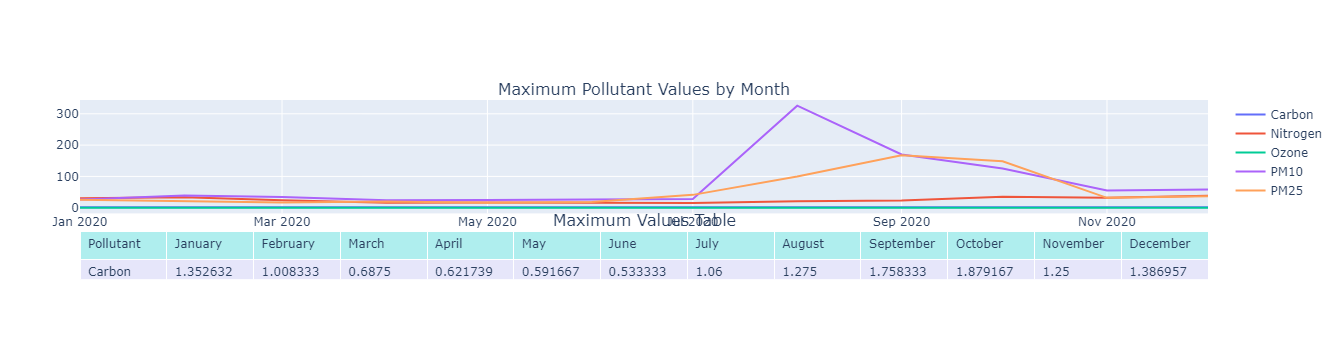

In [39]:
# Add table to the second row
fig.add_trace(go.Table(
    header=dict(values=table_header,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=table_values,
               fill_color='lavender',
               align='left')), row=2, col=1)


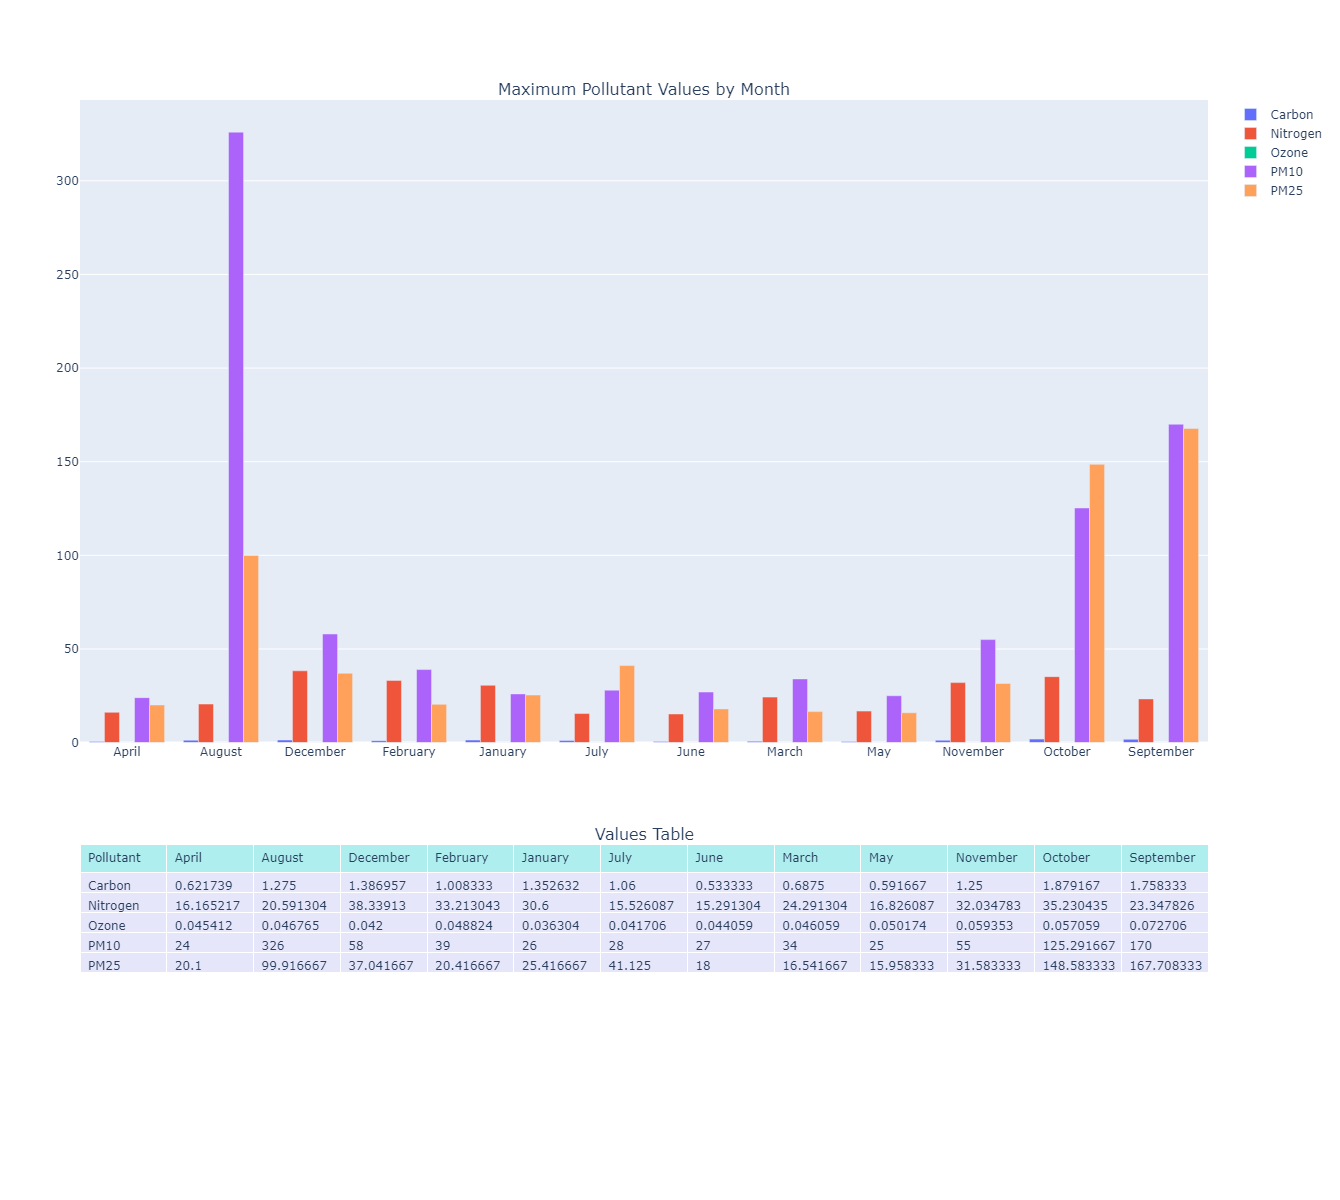

In [20]:
# Update layout for better visualization
fig.update_layout(height=1200,  # Increase the height of the plot
                  showlegend=True)

# Show the plot
fig.show()

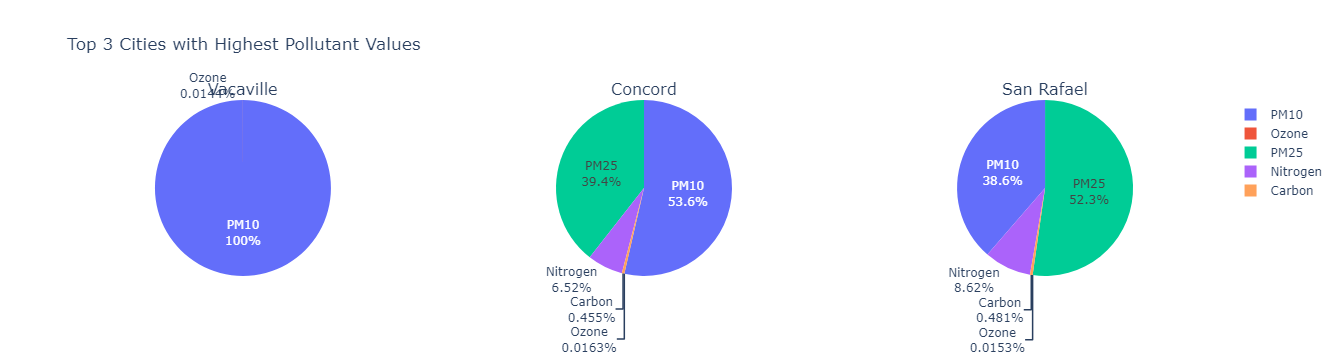

In [44]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by city and pollutant, and take the max value for each group
max_values_by_city = merged_data.groupby(['city', 'pollutant'])['max_value'].max().reset_index()

# Find the top 3 cities with the highest total pollutant values
top3_cities = max_values_by_city.groupby('city')['max_value'].sum().nlargest(3).index

# Filter the data to include only the top 3 cities
top3_data = max_values_by_city[max_values_by_city['city'].isin(top3_cities)]

# Create the pie charts using Plotly
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=top3_cities)

for i, city in enumerate(top3_cities):
    city_data = top3_data[top3_data['city'] == city]
    fig.add_trace(go.Pie(labels=city_data['pollutant'], 
                         values=city_data['max_value'], 
                         name=city, 
                         textinfo='label+percent', 
                         hoverinfo='label+value+percent'), 
                  row=1, col=i+1)

# Update layout for better visualization
fig.update_layout(title='Top 3 Cities with Highest Pollutant Values',
                  showlegend=True)

# Show the plot
fig.show()


In [47]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'


In [48]:
# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])


In [49]:
# Group by city and pollutant, and take the max value for each group
max_values_by_city = merged_data.groupby(['city', 'pollutant', 'date'])['max_value'].max().reset_index()


In [50]:
# Get the average income for each city
average_income_by_city = merged_data.groupby('city')['median_income_2020'].mean().reset_index()


In [51]:
# Merge the max pollutant values and average income data
merged_income_pollutants = pd.merge(max_values_by_city, average_income_by_city, on='city')


In [54]:
# Box Plot: Distribution of maximum pollutant values for different income levels
box_plot_fig = px.box(merged_income_pollutants, x='pollutant', y='max_value', color='pollutant',
                      title='Box Plot of Maximum Pollutant Values by Pollutant Type',
                      labels={'max_value': 'Maximum Pollutant Value'})


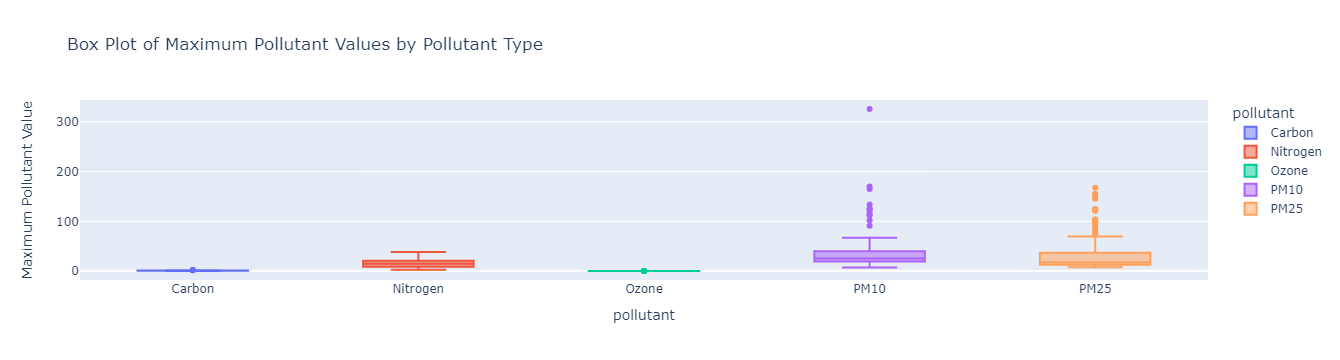

In [55]:
box_plot_fig.show()

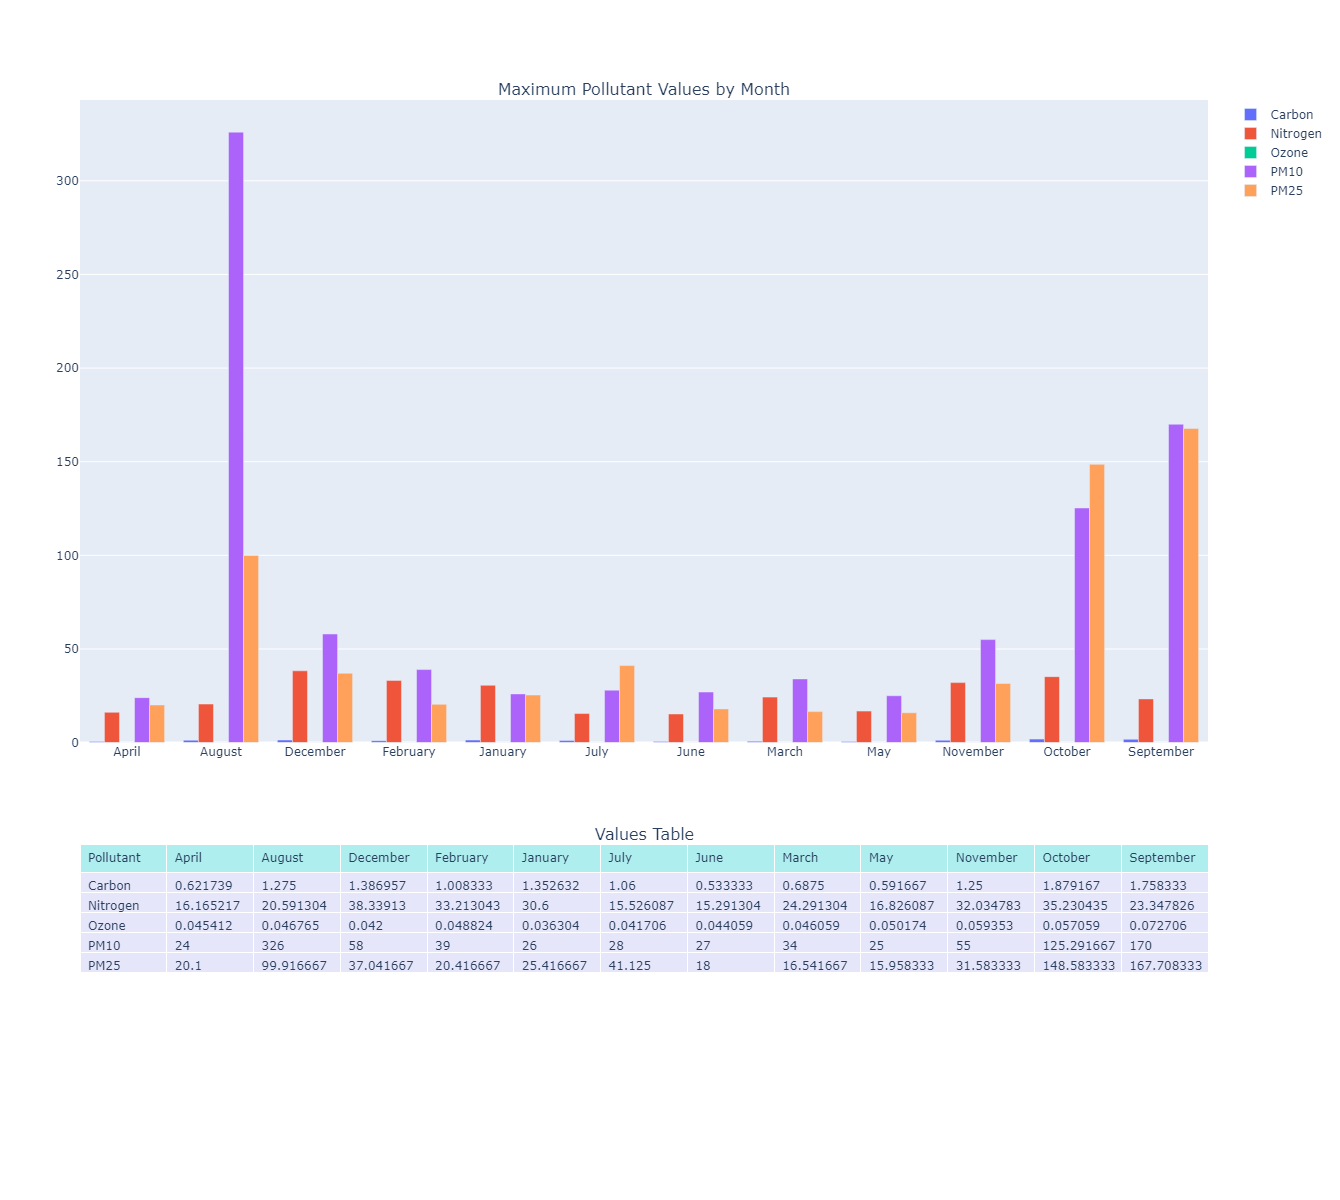

In [19]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby([merged_data['date'].dt.to_period('M'), 'pollutant'])['max_value'].max().reset_index()

# Convert 'date' back to datetime for Plotly and get the month names
max_values_by_month['date'] = max_values_by_month['date'].dt.to_timestamp()
max_values_by_month['month'] = max_values_by_month['date'].dt.strftime('%B')

# Pivot the table for the required layout
pivot_table = max_values_by_month.pivot(index='pollutant', columns='month', values='max_value').reset_index()

# Create the bar chart and table using Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=('Maximum Pollutant Values by Month', 'Values Table'),
                    row_heights=[0.7, 0.3],
                    specs=[[{"type": "bar"}], [{"type": "table"}]])

# Add bar plot to the first row
for pollutant in pivot_table['pollutant']:
    fig.add_trace(go.Bar(x=pivot_table.columns[1:],  # Skip the 'pollutant' column
                         y=pivot_table[pivot_table['pollutant'] == pollutant].values.flatten()[1:], 
                         name=pollutant), row=1, col=1)

# Prepare data for the table
table_header = ['Pollutant'] + list(pivot_table.columns[1:])
table_values = [pivot_table[col] for col in pivot_table.columns]

# Add table to the second row
fig.add_trace(go.Table(
    header=dict(values=table_header,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=table_values,
               fill_color='lavender',
               align='left')), row=2, col=1)

# Update layout for better visualization
fig.update_layout(height=1200, showlegend=True, barmode='group')

# Show the plot
fig.show()


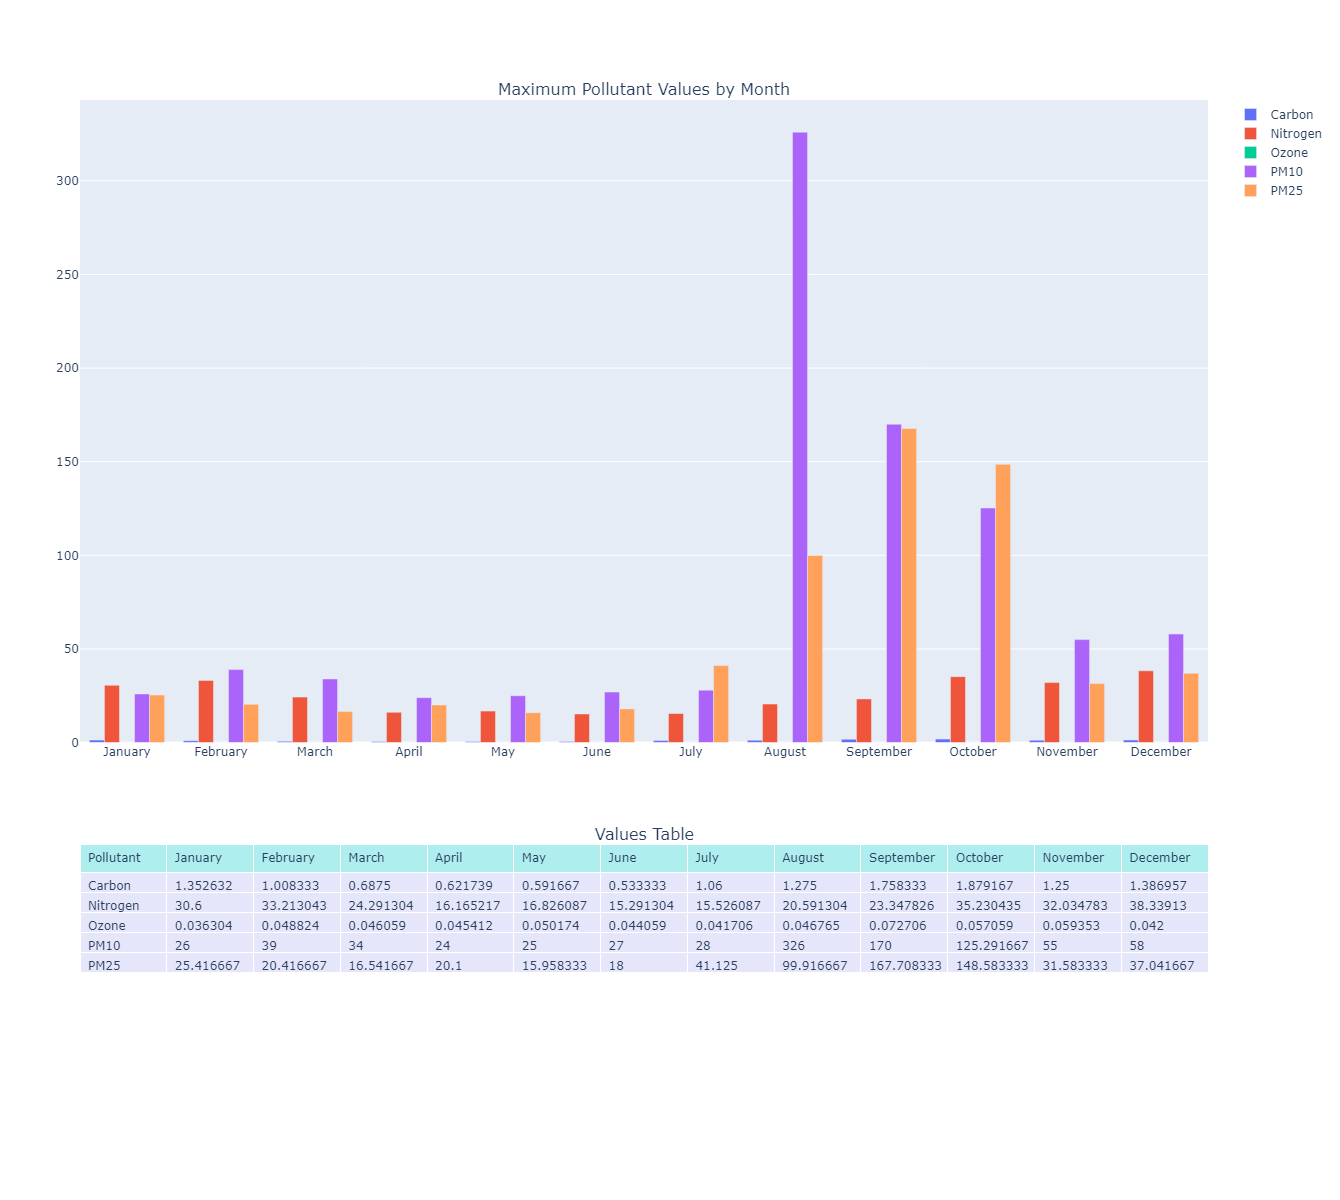

In [1]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby([merged_data['date'].dt.to_period('M'), 'pollutant'])['max_value'].max().reset_index()

# Convert 'date' back to datetime for Plotly and get the month names
max_values_by_month['date'] = max_values_by_month['date'].dt.to_timestamp()
max_values_by_month['month'] = max_values_by_month['date'].dt.strftime('%B')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Ensure the data is sorted by month order
max_values_by_month['month'] = pd.Categorical(max_values_by_month['month'], categories=month_order, ordered=True)
max_values_by_month.sort_values('month', inplace=True)

# Pivot the table for the required layout
pivot_table = max_values_by_month.pivot(index='pollutant', columns='month', values='max_value').reset_index()

# Create the bar chart and table using Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=('Maximum Pollutant Values by Month', 'Values Table'),
                    row_heights=[0.7, 0.3],
                    specs=[[{"type": "bar"}], [{"type": "table"}]])

# Add bar plot to the first row
for pollutant in pivot_table['pollutant']:
    fig.add_trace(go.Bar(x=month_order,  # Use the predefined order
                         y=pivot_table.loc[pivot_table['pollutant'] == pollutant].values.flatten()[1:], 
                         name=pollutant), row=1, col=1)

# Prepare data for the table
table_header = ['Pollutant'] + month_order
table_values = [pivot_table[col] for col in ['pollutant'] + month_order]

# Add table to the second row
fig.add_trace(go.Table(
    header=dict(values=table_header,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=table_values,
               fill_color='lavender',
               align='left')), row=2, col=1)

# Update layout for better visualization
fig.update_layout(height=1200, showlegend=True, barmode='group')

# Show the plot
fig.show()


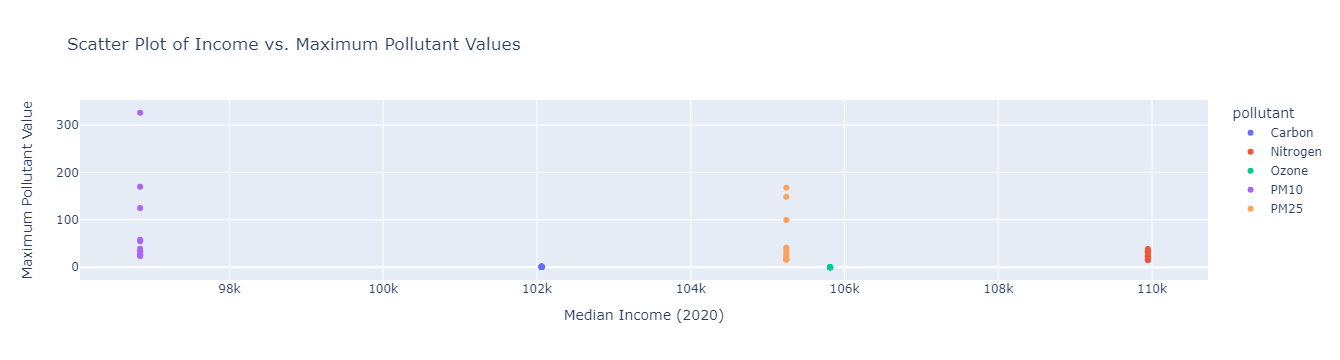

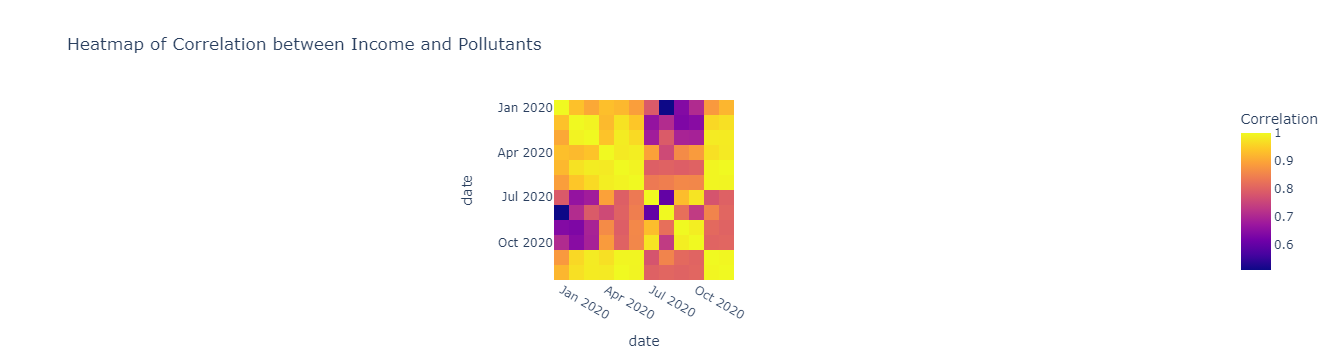

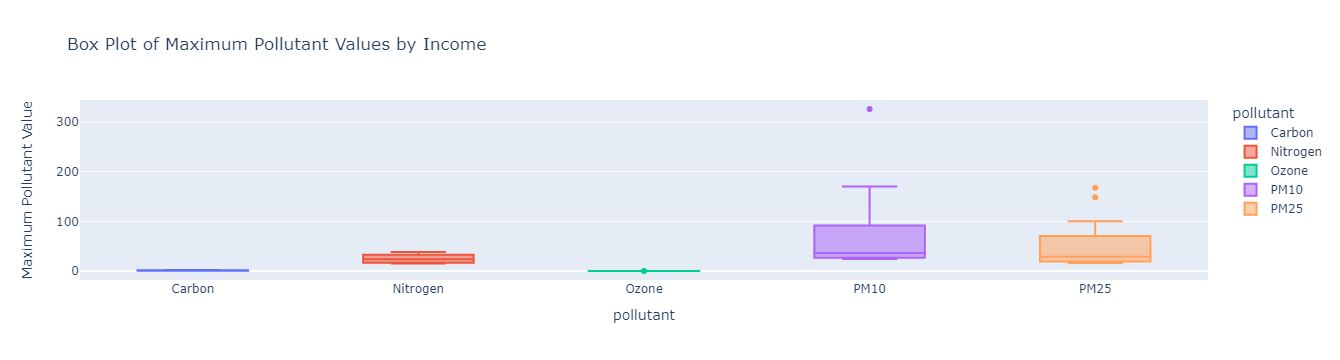

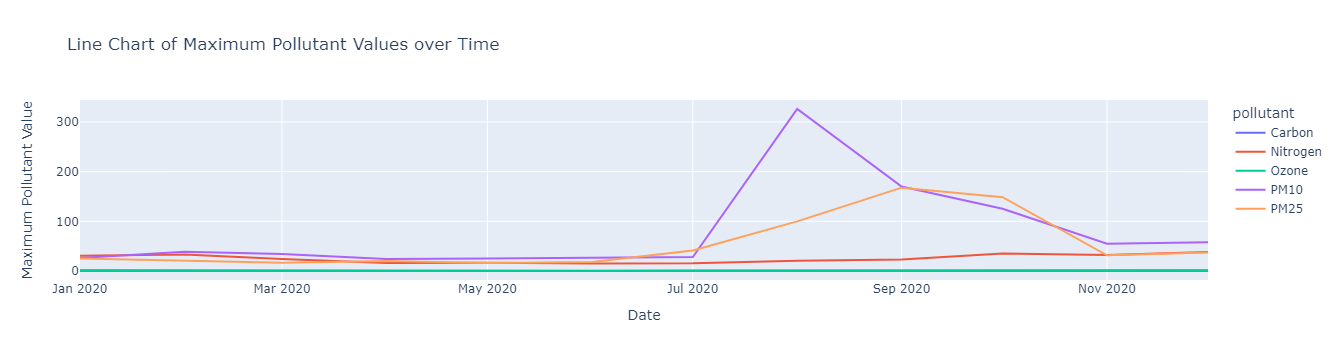

In [68]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby([merged_data['date'].dt.to_period('M'), 'pollutant'])['max_value'].max().reset_index()

# Convert 'date' back to datetime for Plotly and get the month names
max_values_by_month['date'] = max_values_by_month['date'].dt.to_timestamp()
max_values_by_month['month'] = max_values_by_month['date'].dt.strftime('%B')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Ensure the data is sorted by month order
max_values_by_month['month'] = pd.Categorical(max_values_by_month['month'], categories=month_order, ordered=True)
max_values_by_month.sort_values('month', inplace=True)

# Merge income data for scatter plot
merged_income_pollutants = merged_data.groupby(['date', 'pollutant']).agg({
    'max_value': 'max',
    'median_income_2020': 'mean'
}).reset_index()

# Scatter Plot: Income vs. Maximum Pollutant Values
scatter_fig = px.scatter(merged_income_pollutants, 
                         x='median_income_2020', 
                         y='max_value', 
                         color='pollutant', 
                         title='Scatter Plot of Income vs. Maximum Pollutant Values',
                         labels={'median_income_2020': 'Median Income (2020)', 'max_value': 'Maximum Pollutant Value'})

# Heatmap: Correlation between Income and Pollutants
correlation_data = merged_income_pollutants.pivot_table(index='pollutant', columns='date', values='max_value')
heatmap_fig = px.imshow(correlation_data.corr(), 
                        title='Heatmap of Correlation between Income and Pollutants', 
                        labels=dict(color="Correlation"))

# Box Plot: Distribution of Maximum Pollutant Values by Income
box_fig = px.box(merged_income_pollutants, 
                 x='pollutant', 
                 y='max_value', 
                 color='pollutant', 
                 title='Box Plot of Maximum Pollutant Values by Income',
                 labels={'median_income_2020': 'Median Income (2020)', 'max_value': 'Maximum Pollutant Value'})

# Line Chart: Trend of Maximum Pollutant Values over Time
line_fig = px.line(merged_income_pollutants, 
                   x='date', 
                   y='max_value', 
                   color='pollutant', 
                   title='Line Chart of Maximum Pollutant Values over Time',
                   labels={'date': 'Date', 'max_value': 'Maximum Pollutant Value'})

# Show the plots
scatter_fig.show()
heatmap_fig.show()
box_fig.show()
line_fig.show()


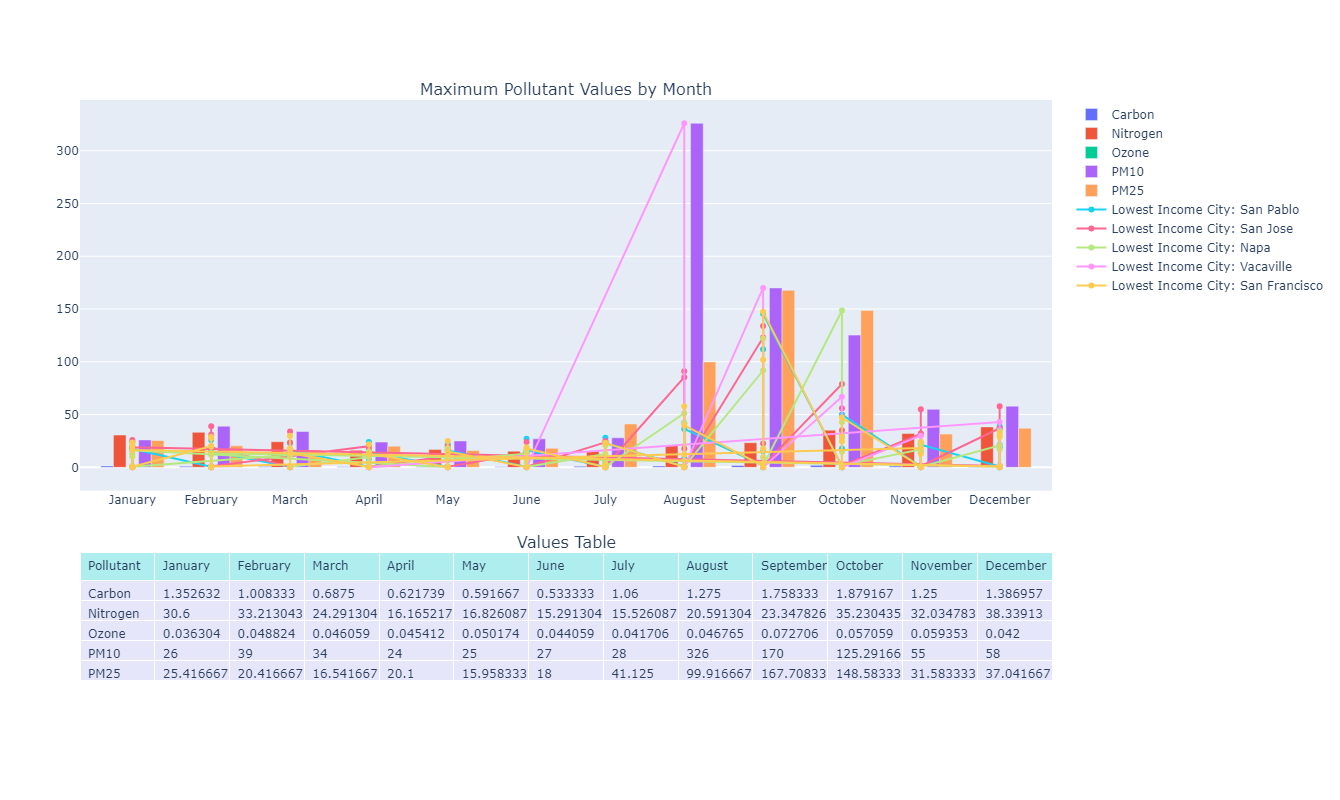

In [3]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby([merged_data['date'].dt.to_period('M'), 'pollutant'])['max_value'].max().reset_index()

# Convert 'date' back to datetime for Plotly and get the month names
max_values_by_month['date'] = max_values_by_month['date'].dt.to_timestamp()
max_values_by_month['month'] = max_values_by_month['date'].dt.strftime('%B')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Ensure the data is sorted by month order
max_values_by_month['month'] = pd.Categorical(max_values_by_month['month'], categories=month_order, ordered=True)
max_values_by_month.sort_values('month', inplace=True)

# Pivot the table for the required layout
pivot_table = max_values_by_month.pivot(index='pollutant', columns='month', values='max_value').reset_index()

# Identify the city with the lowest income each month
lowest_income_city_each_month = merged_data.loc[merged_data.groupby(merged_data['date'].dt.to_period('M'))['median_income_2020'].idxmin()]

# Merge with pollutant data to get max pollutant values for this city
merged_lowest_income_pollutants = pd.merge(lowest_income_city_each_month[['date', 'city', 'median_income_2020']], merged_data, on=['date', 'city'])

# Create the bar chart and table using Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=('Maximum Pollutant Values by Month', 'Values Table'),
                    row_heights=[0.7, 0.3],
                    specs=[[{"type": "bar"}], [{"type": "table"}]])

# Add bar plot to the first row
for pollutant in pivot_table['pollutant']:
    fig.add_trace(go.Bar(x=month_order,  # Use the predefined order
                         y=pivot_table.loc[pivot_table['pollutant'] == pollutant].values.flatten()[1:], 
                         name=pollutant), row=1, col=1)

# Add line plot for the city with the lowest income each month
for city in lowest_income_city_each_month['city'].unique():
    city_data = merged_lowest_income_pollutants[merged_lowest_income_pollutants['city'] == city]
    fig.add_trace(go.Scatter(x=city_data['date'].dt.strftime('%B'), y=city_data['max_value'], 
                             mode='lines+markers', name=f'Lowest Income City: {city}'), row=1, col=1)

# Prepare data for the table
table_header = ['Pollutant'] + month_order
table_values = [pivot_table[col] for col in ['pollutant'] + month_order]

# Add table to the second row
fig.add_trace(go.Table(
    header=dict(values=table_header,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=table_values,
               fill_color='lavender',
               align='left')), row=2, col=1)

# Update layout for better visualization
fig.update_layout(height=800, showlegend=True, barmode='group')

# Show the plot
fig.show()


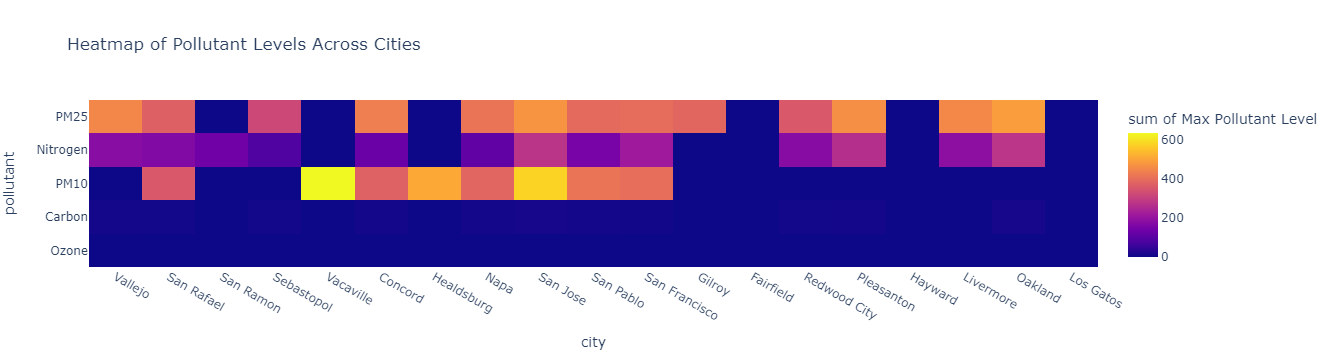

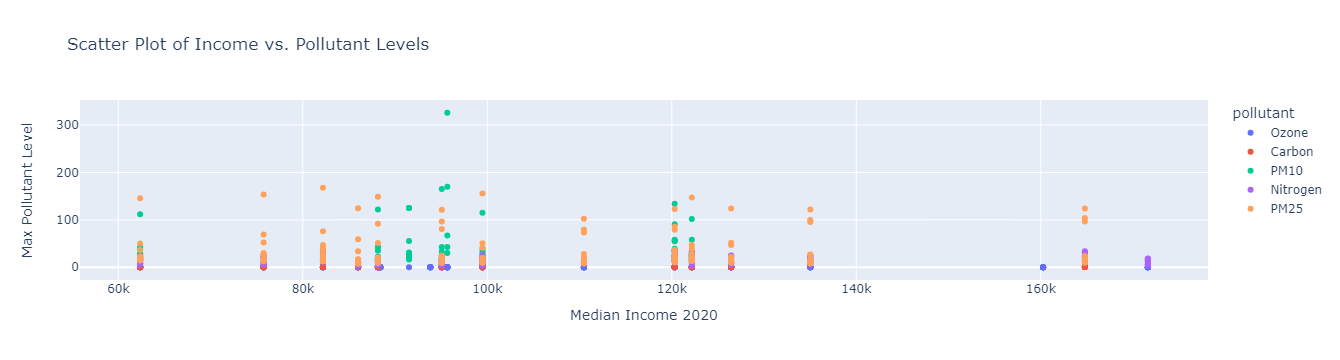

C:\Users\Jonathan Gonzalez\AppData\Local\Temp\ipykernel_1124\499621033.py:77: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



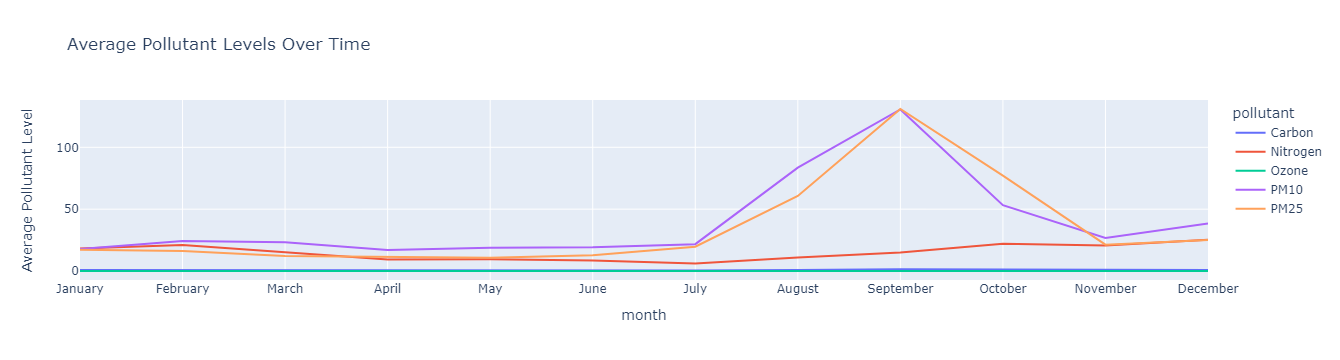

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [17]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Ensure the data is sorted by month order
merged_data['month'] = pd.Categorical(merged_data['date'].dt.strftime('%B'), categories=month_order, ordered=True)
merged_data.sort_values('month', inplace=True)

# Heatmap of Pollutant Levels Across Cities
heatmap_fig = px.density_heatmap(
    merged_data,
    x='city',
    y='pollutant',
    z='max_value',
    title='Heatmap of Pollutant Levels Across Cities',
    labels={'max_value': 'Max Pollutant Level'}
)
heatmap_fig.show()

# Scatter Plot of Income vs. Pollutant Levels
scatter_fig = px.scatter(
    merged_data,
    x='median_income_2020',
    y='max_value',
    color='pollutant',
    title='Scatter Plot of Income vs. Pollutant Levels',
    labels={'median_income_2020': 'Median Income 2020', 'max_value': 'Max Pollutant Level'}
)
scatter_fig.show()

# Line Chart of Average Pollutant Levels Over Time
average_pollutants = merged_data.groupby(['month', 'pollutant'])['max_value'].mean().reset_index()
line_fig = px.line(
    average_pollutants,
    x='month',
    y='max_value',
    color='pollutant',
    title='Average Pollutant Levels Over Time',
    labels={'max_value': 'Average Pollutant Level'}
)
line_fig.show()

# Bubble Chart of Pollutant Levels by City and Income
bubble_fig = px.scatter(
    merged_data,
    x='median_income_2020',
    y='max_value',
    size='max_value',
    color='pollutant',
    hover_name='city',
    title='Bubble Chart of Pollutant Levels by City and Income',
    labels={'median_income_2020': 'Median Income 2020', 'max_value': 'Max Pollutant Level'}
)
bubble_fig.show()

# Box Plot of Pollutant Levels by Income Quartiles
merged_data['income_quartile'] = pd.qcut(merged_data['median_income_2020'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
box_fig = px.box(
    merged_data,
    x='income_quartile',
    y='max_value',
    color='pollutant',
    title='Box Plot of Pollutant Levels by Income Quartiles',
    labels={'income_quartile': 'Income Quartile', 'max_value': 'Max Pollutant Level'}
)
box_fig.show()


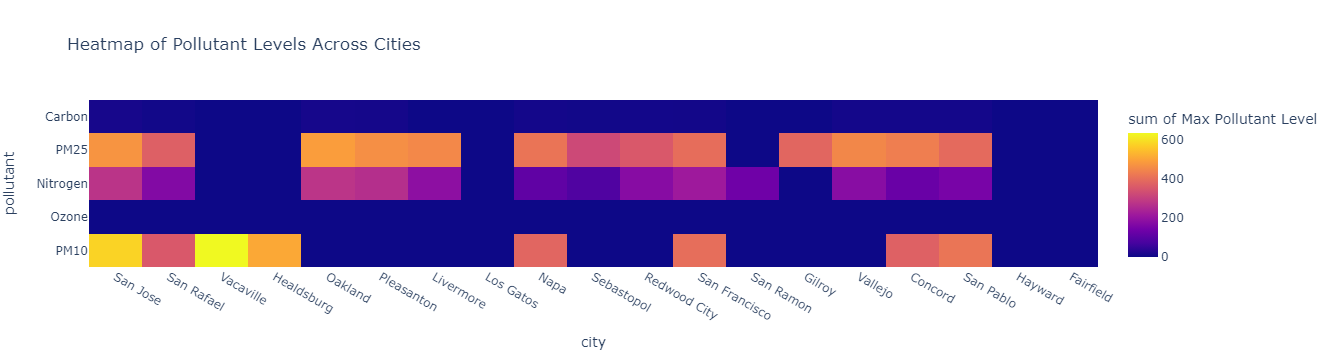

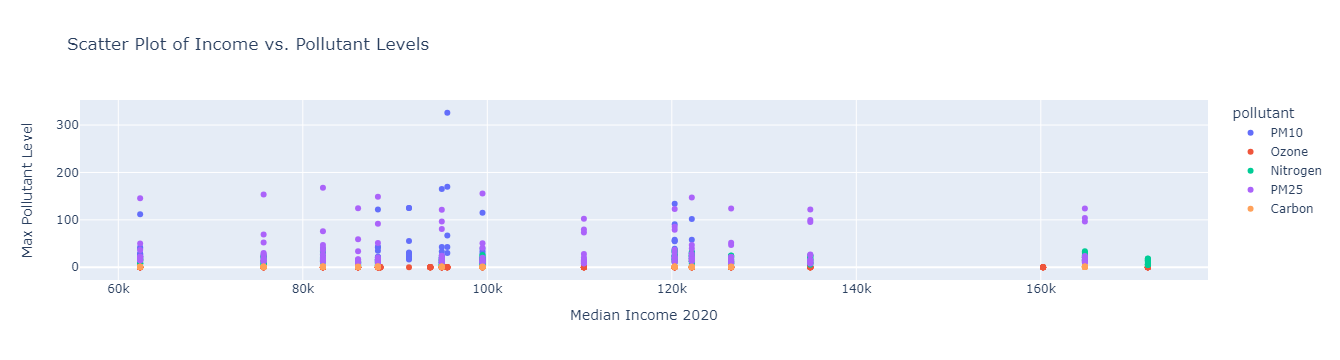

C:\Users\Jonathan Gonzalez\AppData\Local\Temp\ipykernel_1124\675001253.py:80: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



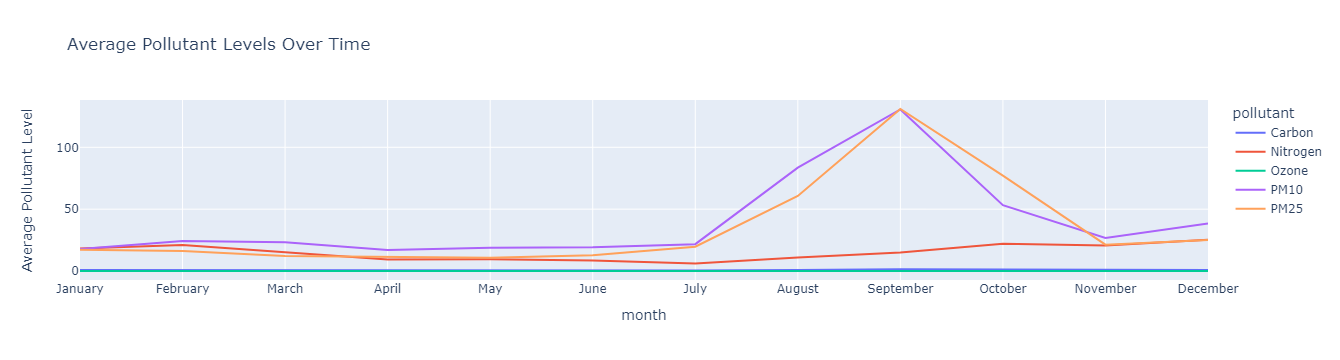

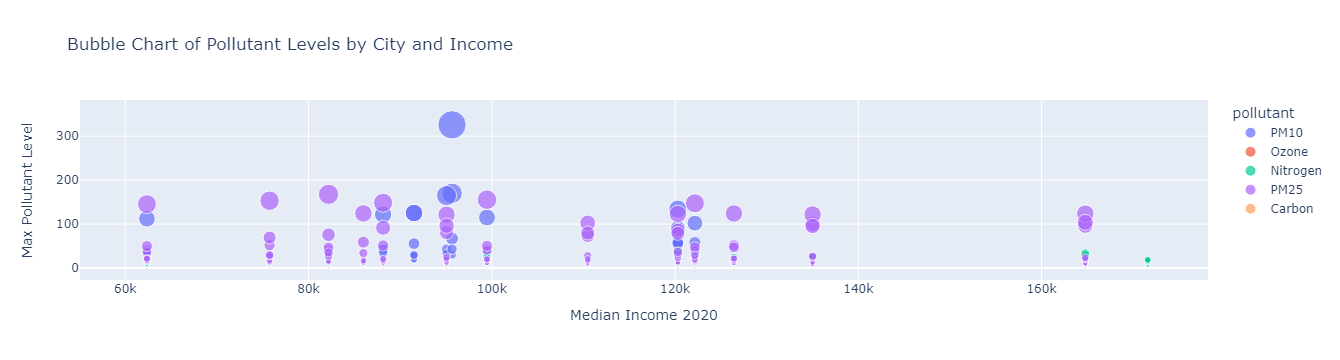

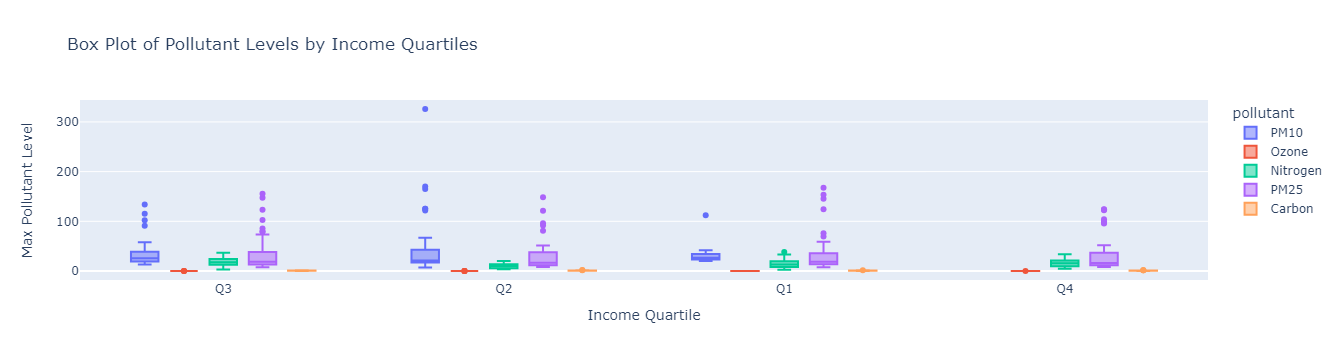

In [18]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Remove rows with missing max_value
merged_data = merged_data.dropna(subset=['max_value'])

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Ensure the data is sorted by month order
merged_data['month'] = pd.Categorical(merged_data['date'].dt.strftime('%B'), categories=month_order, ordered=True)
merged_data.sort_values('month', inplace=True)

# Heatmap of Pollutant Levels Across Cities
heatmap_fig = px.density_heatmap(
    merged_data,
    x='city',
    y='pollutant',
    z='max_value',
    title='Heatmap of Pollutant Levels Across Cities',
    labels={'max_value': 'Max Pollutant Level'}
)
heatmap_fig.show()

# Scatter Plot of Income vs. Pollutant Levels
scatter_fig = px.scatter(
    merged_data,
    x='median_income_2020',
    y='max_value',
    color='pollutant',
    title='Scatter Plot of Income vs. Pollutant Levels',
    labels={'median_income_2020': 'Median Income 2020', 'max_value': 'Max Pollutant Level'}
)
scatter_fig.show()

# Line Chart of Average Pollutant Levels Over Time
average_pollutants = merged_data.groupby(['month', 'pollutant'])['max_value'].mean().reset_index()
line_fig = px.line(
    average_pollutants,
    x='month',
    y='max_value',
    color='pollutant',
    title='Average Pollutant Levels Over Time',
    labels={'max_value': 'Average Pollutant Level'}
)
line_fig.show()

# Bubble Chart of Pollutant Levels by City and Income
bubble_fig = px.scatter(
    merged_data,
    x='median_income_2020',
    y='max_value',
    size='max_value',
    color='pollutant',
    hover_name='city',
    title='Bubble Chart of Pollutant Levels by City and Income',
    labels={'median_income_2020': 'Median Income 2020', 'max_value': 'Max Pollutant Level'}
)
bubble_fig.show()

# Box Plot of Pollutant Levels by Income Quartiles
merged_data['income_quartile'] = pd.qcut(merged_data['median_income_2020'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
box_fig = px.box(
    merged_data,
    x='income_quartile',
    y='max_value',
    color='pollutant',
    title='Box Plot of Pollutant Levels by Income Quartiles',
    labels={'income_quartile': 'Income Quartile', 'max_value': 'Max Pollutant Level'}
)
box_fig.show()


First few rows of Carbon DataFrame:
   Unnamed: 0     city       date  max_value  median_income pollutant
0           0  Concord 2020-04-01   0.300000        95066.0    Carbon
1           1  Concord 2020-01-01   0.686957        95066.0    Carbon
2           2  Concord 2020-02-01   0.665217        95066.0    Carbon
3           3  Concord 2020-03-01   0.443478        95066.0    Carbon
4           4  Concord 2020-05-01   0.313043        95066.0    Carbon 

First few rows of Nitrogen DataFrame:
   Unnamed: 0     city       date  max_value  median_income pollutant
0           0  Concord 2020-04-01   6.043478        95066.0  Nitrogen
1           1  Concord 2020-03-01  10.030435        95066.0  Nitrogen
2           2  Concord 2020-02-01  16.356522        95066.0  Nitrogen
3           3  Concord 2020-05-01   4.434783        95066.0  Nitrogen
4           4  Concord 2020-01-01  14.413043        95066.0  Nitrogen 

First few rows of Ozone DataFrame:
   Unnamed: 0     city       date  max_value  m

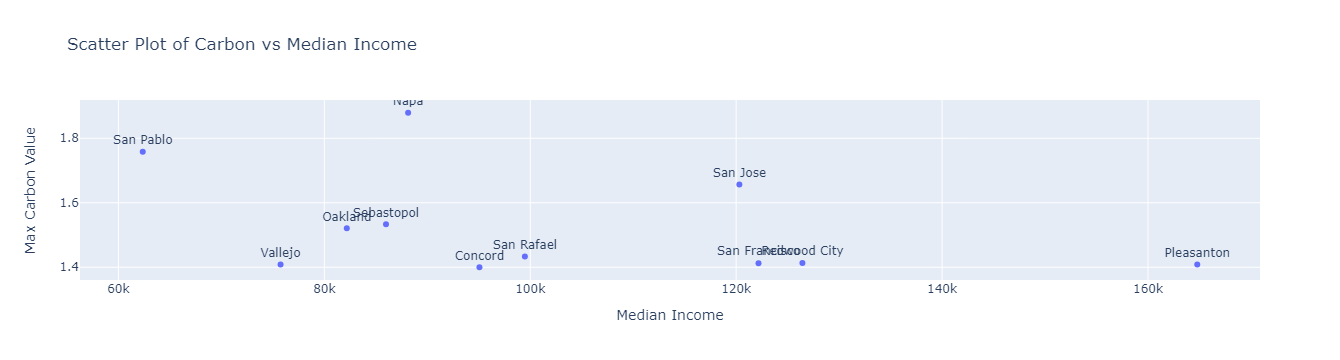

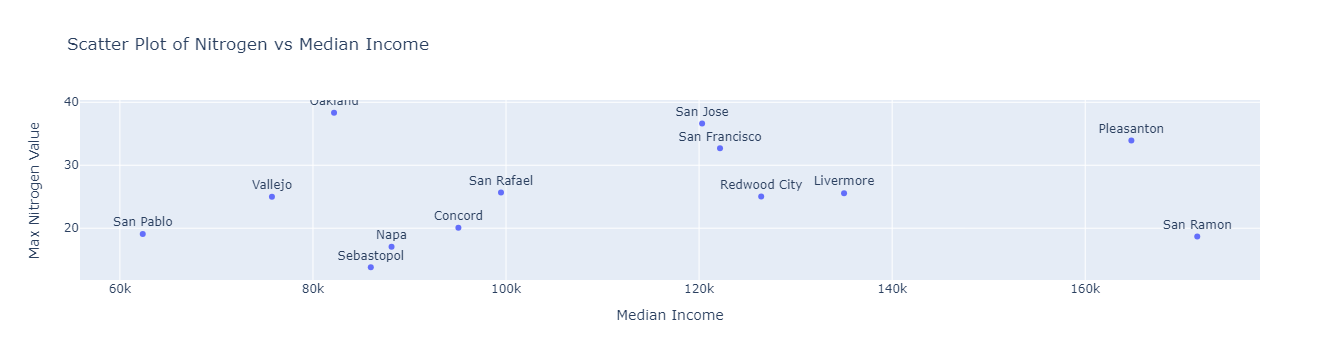

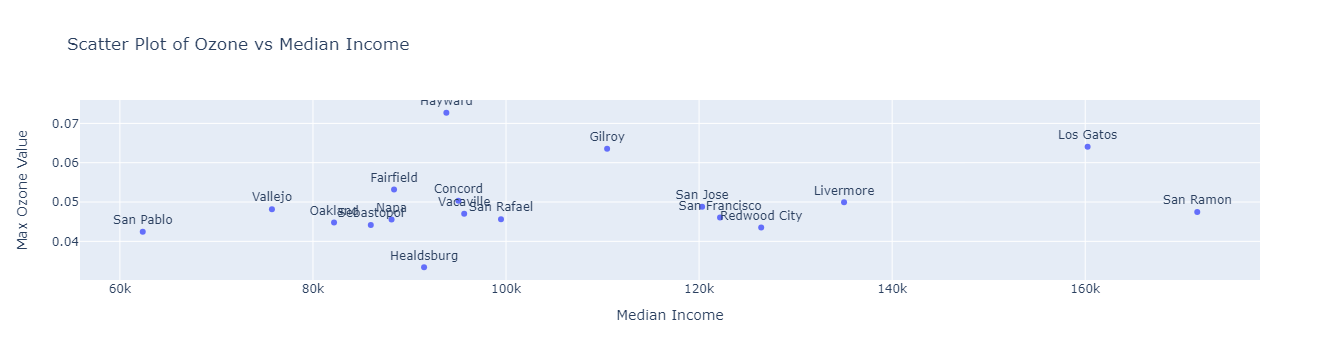

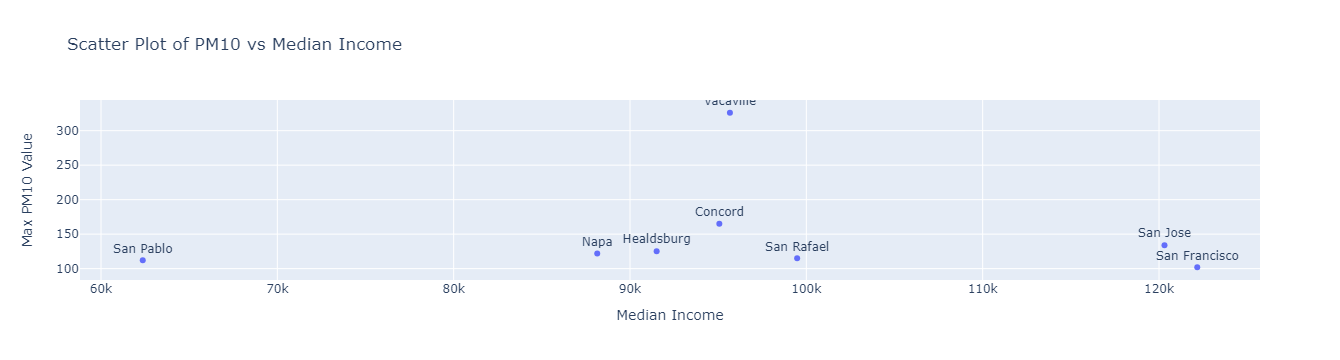

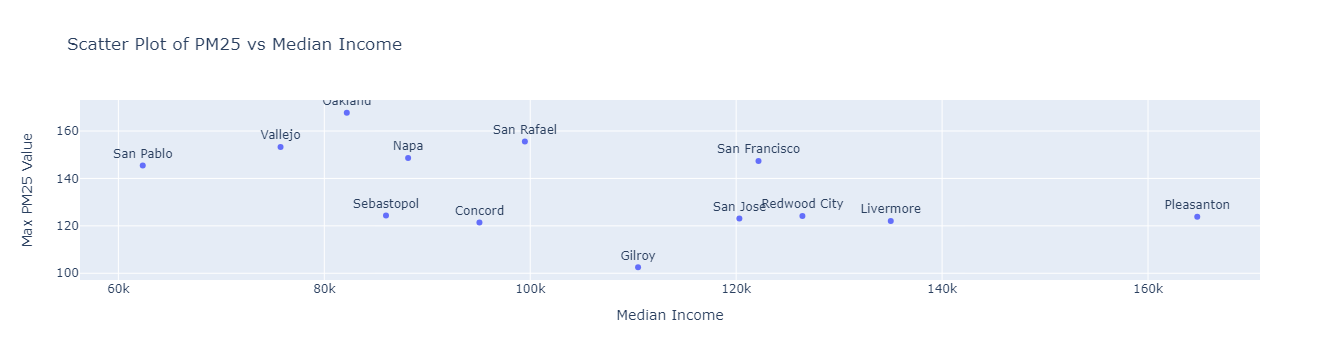

In [26]:
import os
import pandas as pd
import plotly.express as px

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Check if 'median_income' column exists and is not null in all dataframes
dataframes = [carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data]
pollutant_names = ['Carbon', 'Nitrogen', 'Ozone', 'PM10', 'PM25']

# Print first few rows of each dataframe to inspect the data
for df, name in zip(dataframes, pollutant_names):
    print(f"First few rows of {name} DataFrame:")
    print(df.head(), "\n")
    if 'median_income' not in df.columns:
        print(f"Error: 'median_income' column is missing in the {name} DataFrame.")
    elif df['median_income'].isnull().all():
        print(f"Error: 'median_income' column contains all null values in the {name} DataFrame.")

# If 'median_income' column is missing or contains all null values, raise an error
for df, name in zip(dataframes, pollutant_names):
    if 'median_income' not in df.columns or df['median_income'].isnull().all():
        raise ValueError(f"The column 'median_income' is missing or contains all null values in the dataframe for {name}.")

# Concatenate all DataFrames into one
merged_data = pd.concat(dataframes)

# Group by city and pollutant, and take the max value for each group
max_values_by_city = merged_data.groupby(['city', 'pollutant', 'median_income'])['max_value'].max().reset_index()

# Create scatter plots for each pollutant
pollutants = ['Carbon', 'Nitrogen', 'Ozone', 'PM10', 'PM25']

for pollutant in pollutants:
    pollutant_data = max_values_by_city[max_values_by_city['pollutant'] == pollutant]
    fig = px.scatter(pollutant_data, x='median_income', y='max_value', text='city',
                     title=f'Scatter Plot of {pollutant} vs Median Income',
                     labels={'median_income': 'Median Income', 'max_value': f'Max {pollutant} Value'})
    
    # Add city labels to the scatter plot
    fig.update_traces(textposition='top center')
    
    # Show the plot
    fig.show()


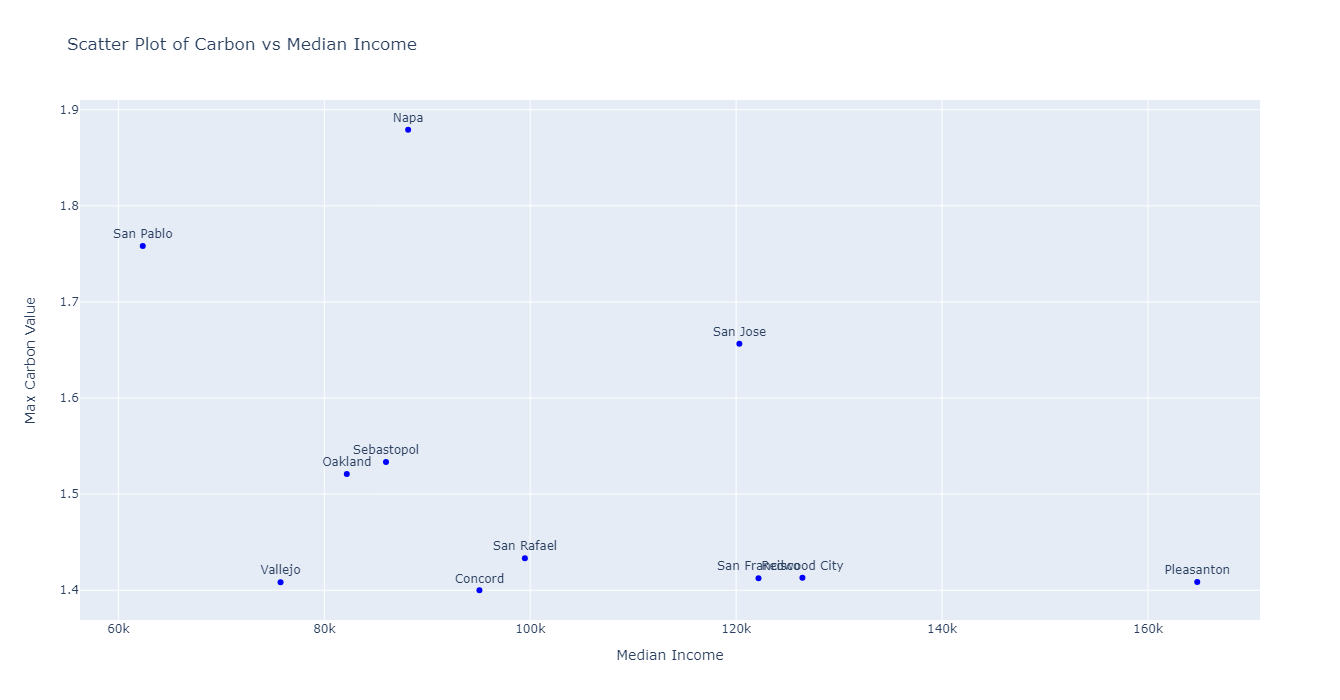

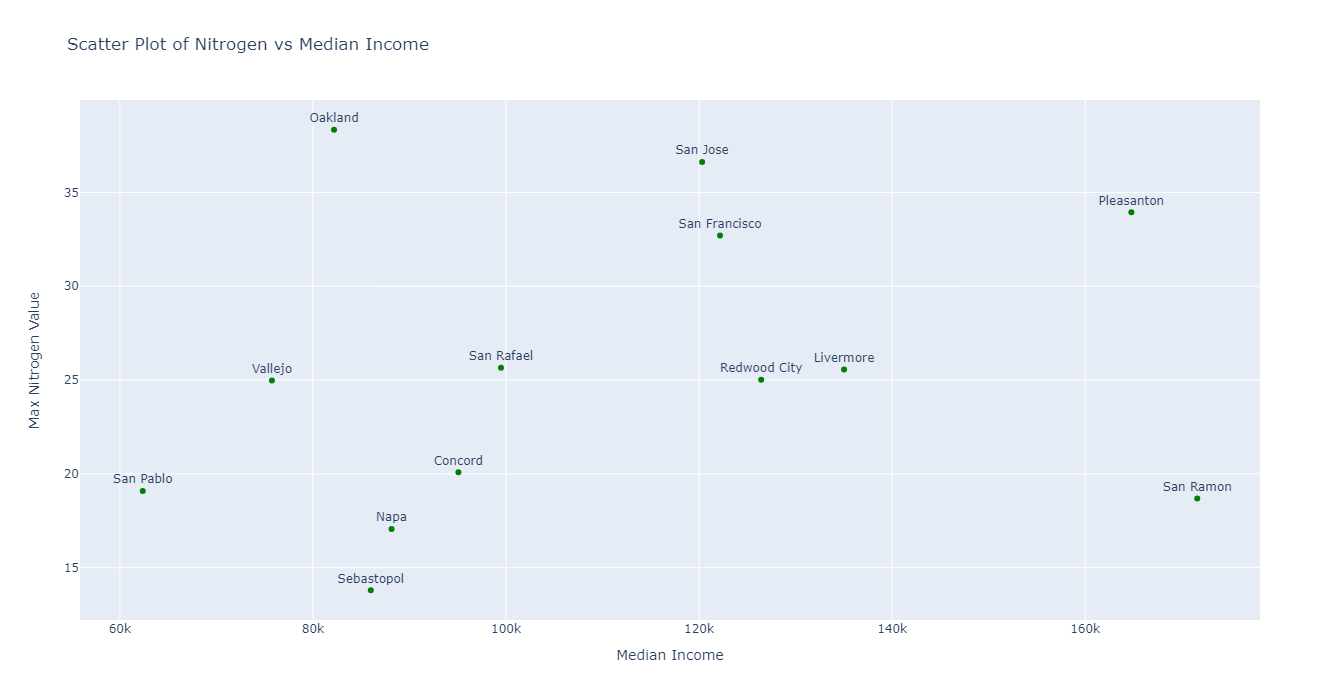

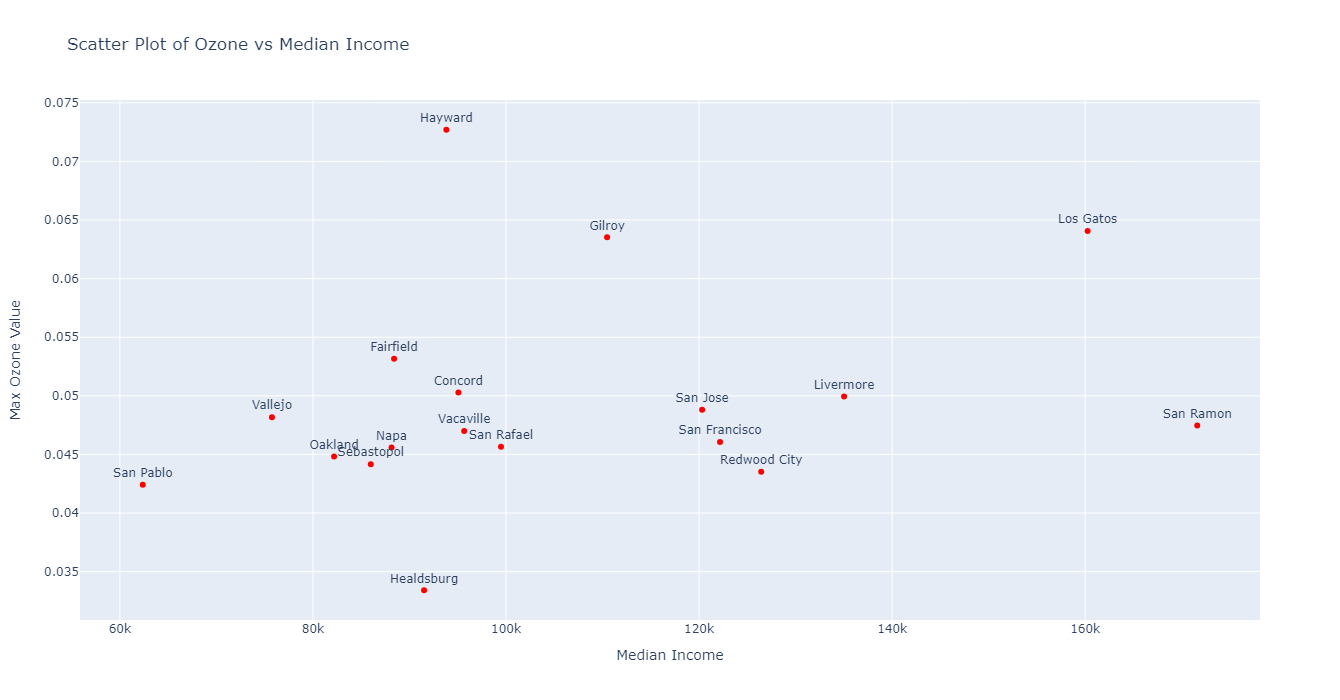

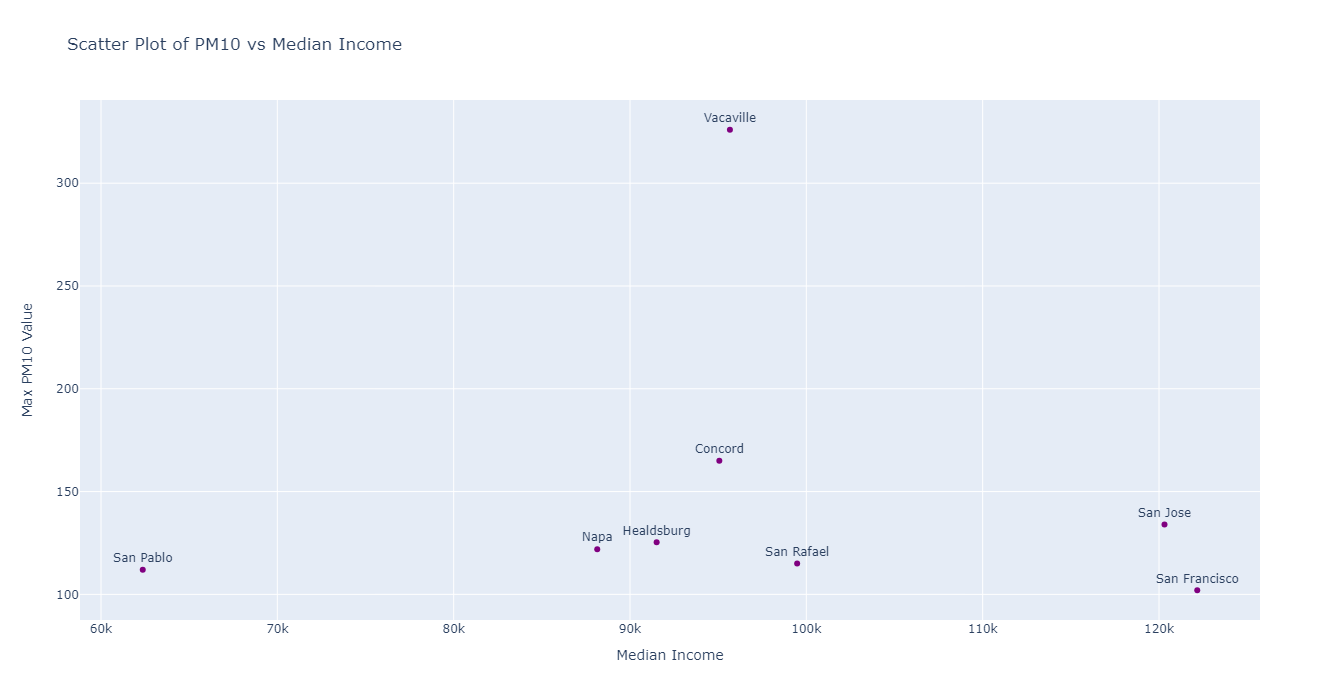

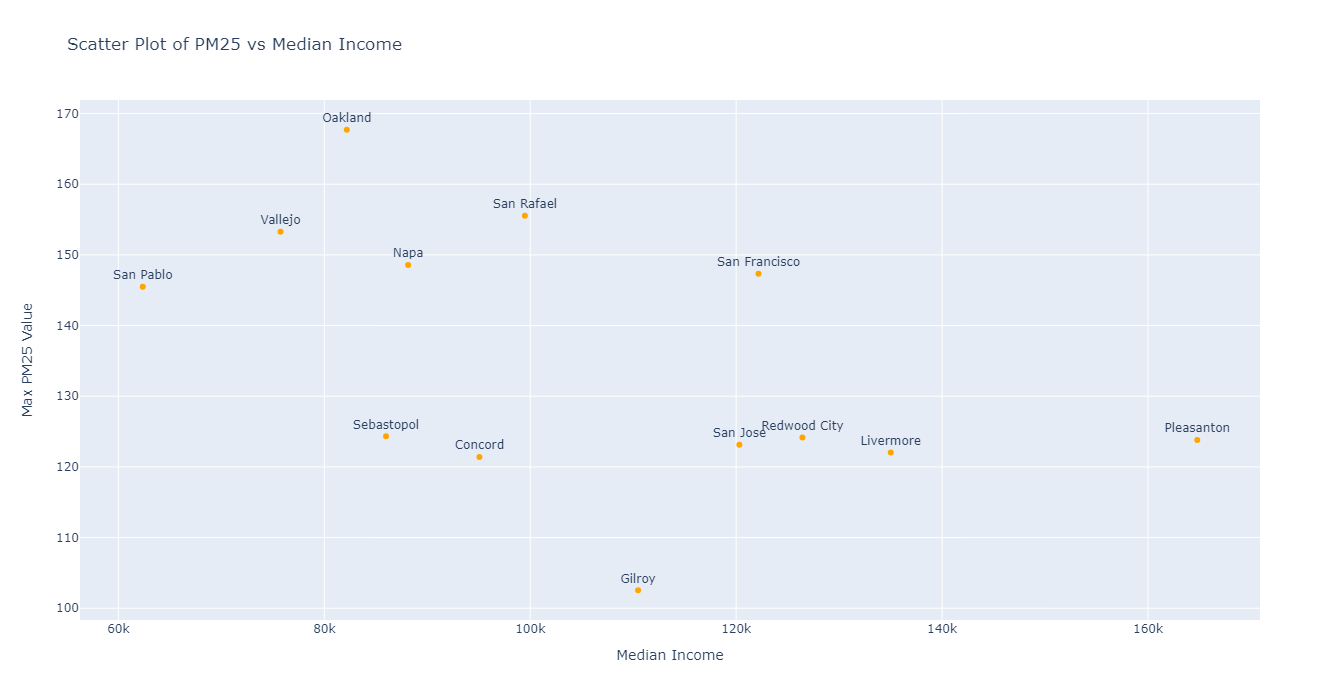

In [27]:
import os
import pandas as pd
import plotly.express as px

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by city and pollutant, and take the max value for each group
max_values_by_city = merged_data.groupby(['city', 'pollutant', 'median_income'])['max_value'].max().reset_index()

# Create scatter plots for each pollutant
pollutants = ['Carbon', 'Nitrogen', 'Ozone', 'PM10', 'PM25']
colors = {'Carbon': 'blue', 'Nitrogen': 'green', 'Ozone': 'red', 'PM10': 'purple', 'PM25': 'orange'}

for pollutant in pollutants:
    pollutant_data = max_values_by_city[max_values_by_city['pollutant'] == pollutant]
    fig = px.scatter(pollutant_data, x='median_income', y='max_value', text='city',
                     title=f'Scatter Plot of {pollutant} vs Median Income',
                     labels={'median_income': 'Median Income', 'max_value': f'Max {pollutant} Value'},
                     color_discrete_sequence=[colors[pollutant]])
    
    # Add city labels to the scatter plot
    fig.update_traces(textposition='top center')
    
    # Adjust figure size
    fig.update_layout(width=1000, height=700)
    
    # Show the plot
    fig.show()


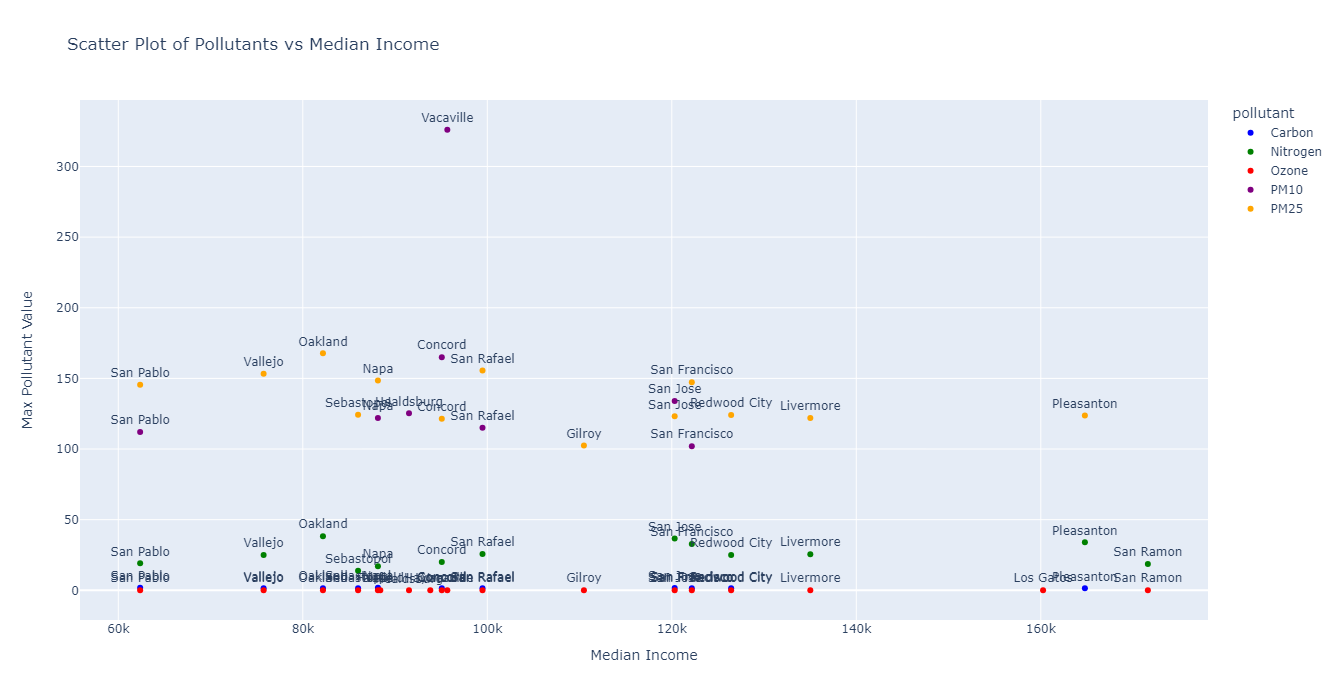

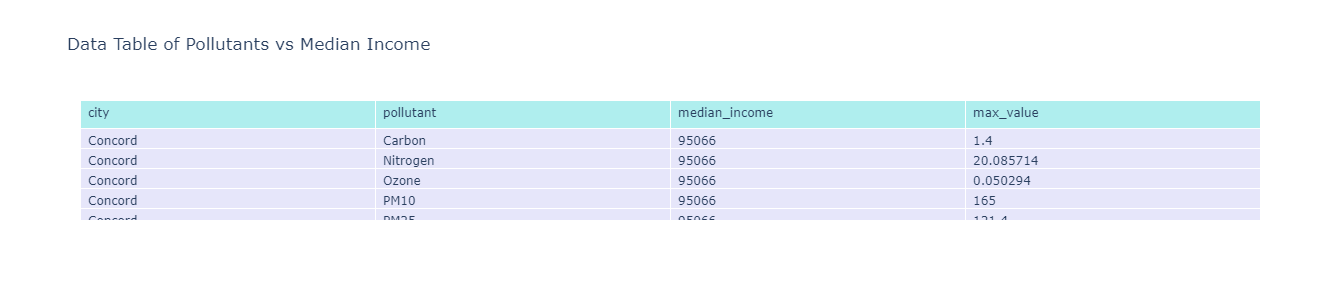

In [28]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by city and pollutant, and take the max value for each group
max_values_by_city = merged_data.groupby(['city', 'pollutant', 'median_income'])['max_value'].max().reset_index()

# Create scatter plot with all pollutants
fig = px.scatter(max_values_by_city, x='median_income', y='max_value', color='pollutant', text='city',
                 title='Scatter Plot of Pollutants vs Median Income',
                 labels={'median_income': 'Median Income', 'max_value': 'Max Pollutant Value'},
                 color_discrete_map={'Carbon': 'blue', 'Nitrogen': 'green', 'Ozone': 'red', 'PM10': 'purple', 'PM25': 'orange'})

# Add city labels to the scatter plot
fig.update_traces(textposition='top center')

# Adjust figure size
fig.update_layout(width=1000, height=700)

# Create table with data
table = go.Figure(data=[go.Table(
    header=dict(values=list(max_values_by_city.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[max_values_by_city.city, max_values_by_city.pollutant, max_values_by_city.median_income, max_values_by_city.max_value],
               fill_color='lavender',
               align='left'))
])

# Adjust table size
table.update_layout(width=1000, height=300, title='Data Table of Pollutants vs Median Income')

# Show the plots
fig.show()
table.show()


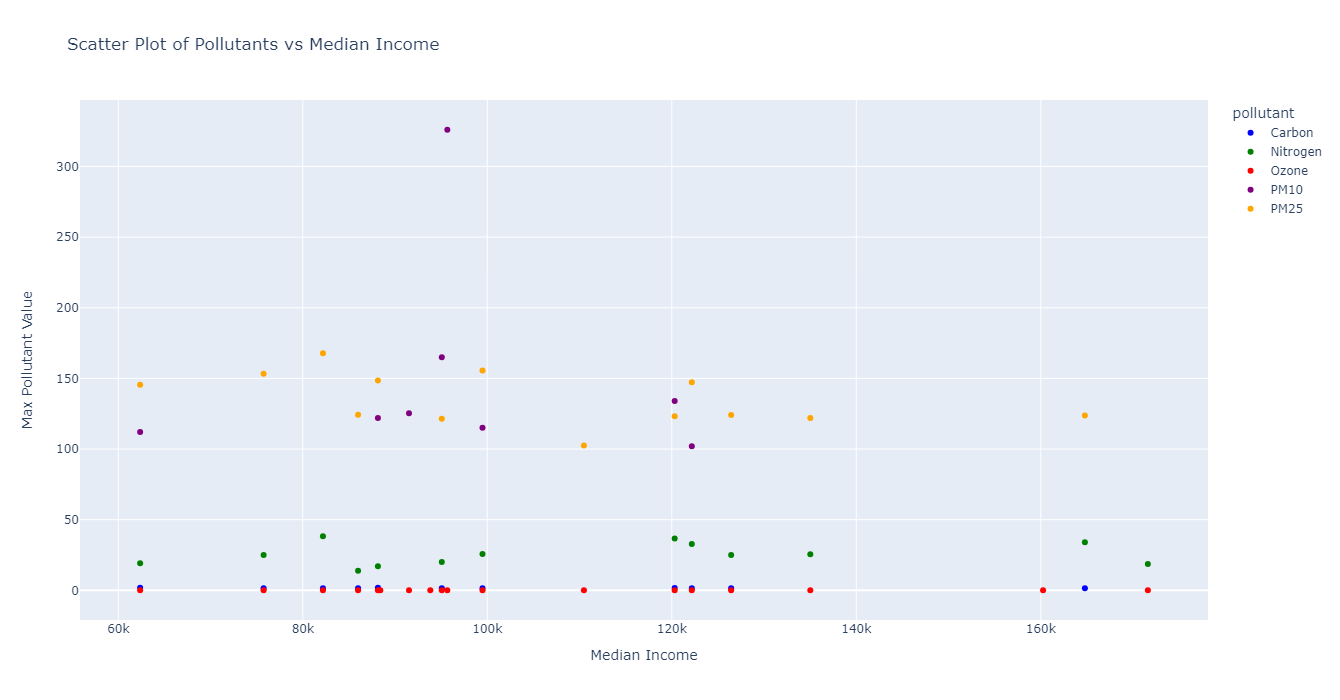

In [29]:
import os
import pandas as pd
import plotly.express as px

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by city and pollutant, and take the max value for each group
max_values_by_city = merged_data.groupby(['city', 'pollutant', 'median_income'])['max_value'].max().reset_index()

# Create scatter plot with all pollutants
fig = px.scatter(max_values_by_city, x='median_income', y='max_value', color='pollutant',
                 title='Scatter Plot of Pollutants vs Median Income',
                 labels={'median_income': 'Median Income', 'max_value': 'Max Pollutant Value'},
                 color_discrete_map={'Carbon': 'blue', 'Nitrogen': 'green', 'Ozone': 'red', 'PM10': 'purple', 'PM25': 'orange'})

# Adjust figure size
fig.update_layout(width=1000, height=700)

# Show the plot
fig.show()


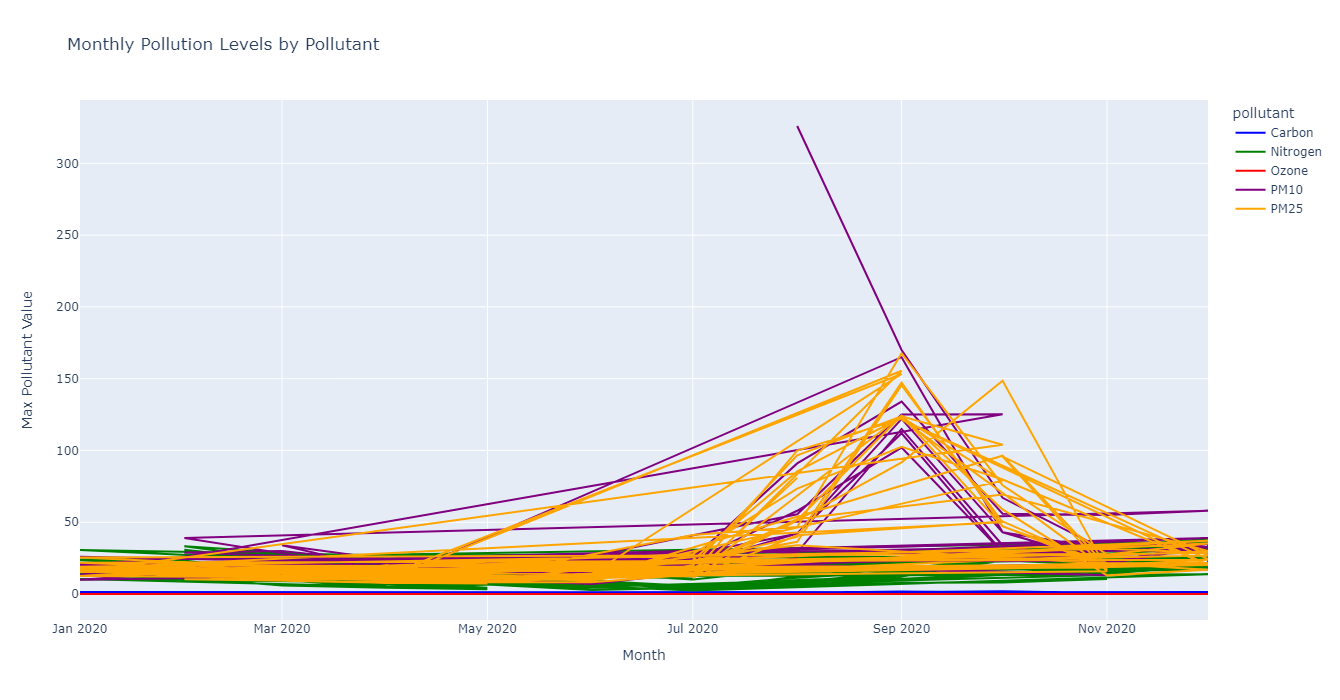

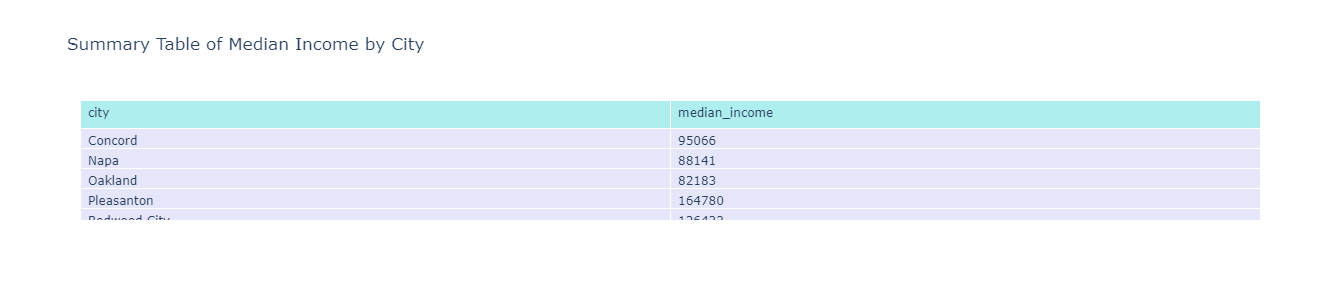

In [30]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Create a line plot with all pollutants
fig = px.line(merged_data, x='date', y='max_value', color='pollutant',
              title='Monthly Pollution Levels by Pollutant',
              labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
              color_discrete_map={'Carbon': 'blue', 'Nitrogen': 'green', 'Ozone': 'red', 'PM10': 'purple', 'PM25': 'orange'},
              line_group='pollutant',
              hover_data=['city'])

# Adjust figure size
fig.update_layout(width=1000, height=700)

# Show the plot
fig.show()

# Create a summary table with income data
income_summary = merged_data[['city', 'median_income']].drop_duplicates().reset_index(drop=True)

# Create table with data
table = go.Figure(data=[go.Table(
    header=dict(values=list(income_summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[income_summary.city, income_summary.median_income],
               fill_color='lavender',
               align='left'))
])

# Adjust table size
table.update_layout(width=1000, height=300, title='Summary Table of Median Income by City')

# Show the table
table.show()


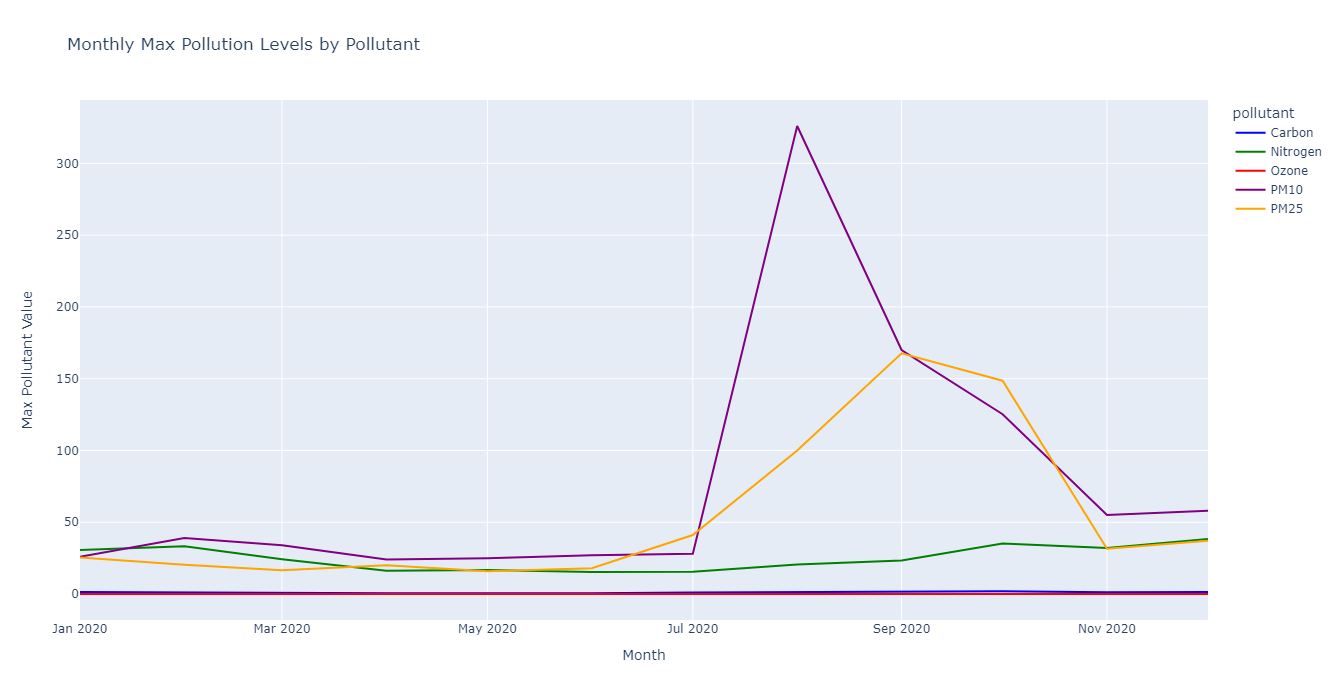

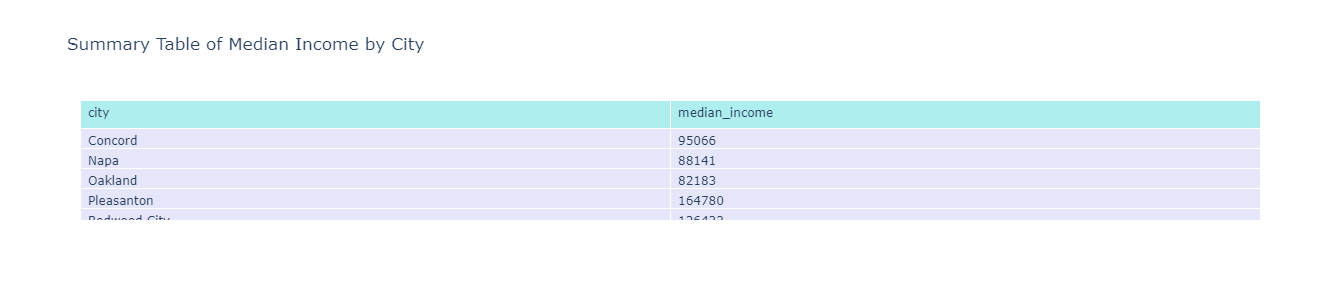

In [31]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby(['date', 'pollutant'])['max_value'].max().reset_index()

# Create a line plot with all pollutants
fig = px.line(max_values_by_month, x='date', y='max_value', color='pollutant',
              title='Monthly Max Pollution Levels by Pollutant',
              labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
              color_discrete_map={'Carbon': 'blue', 'Nitrogen': 'green', 'Ozone': 'red', 'PM10': 'purple', 'PM25': 'orange'},
              line_group='pollutant')

# Adjust figure size
fig.update_layout(width=1000, height=700)

# Show the plot
fig.show()

# Create a summary table with income data
income_summary = merged_data[['city', 'median_income']].drop_duplicates().reset_index(drop=True)

# Create table with data
table = go.Figure(data=[go.Table(
    header=dict(values=list(income_summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[income_summary.city, income_summary.median_income],
               fill_color='lavender',
               align='left'))
])

# Adjust table size
table.update_layout(width=1000, height=300, title='Summary Table of Median Income by City')

# Show the table
table.show()


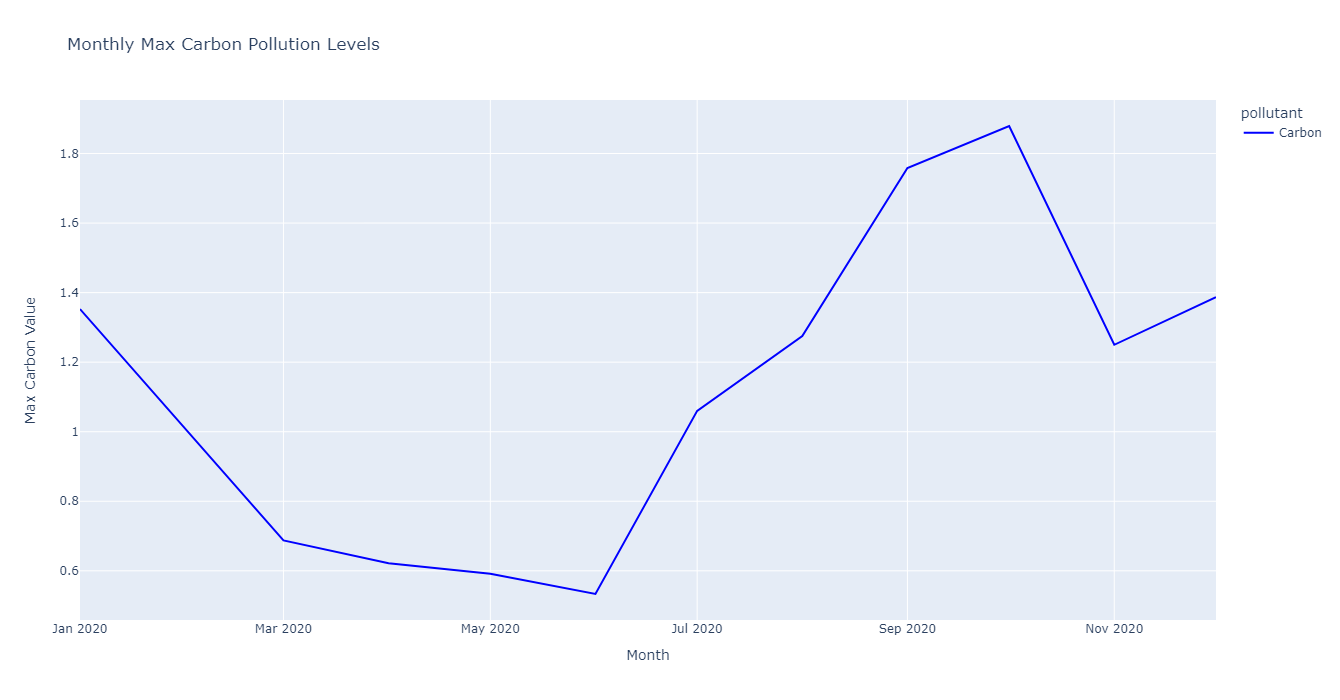

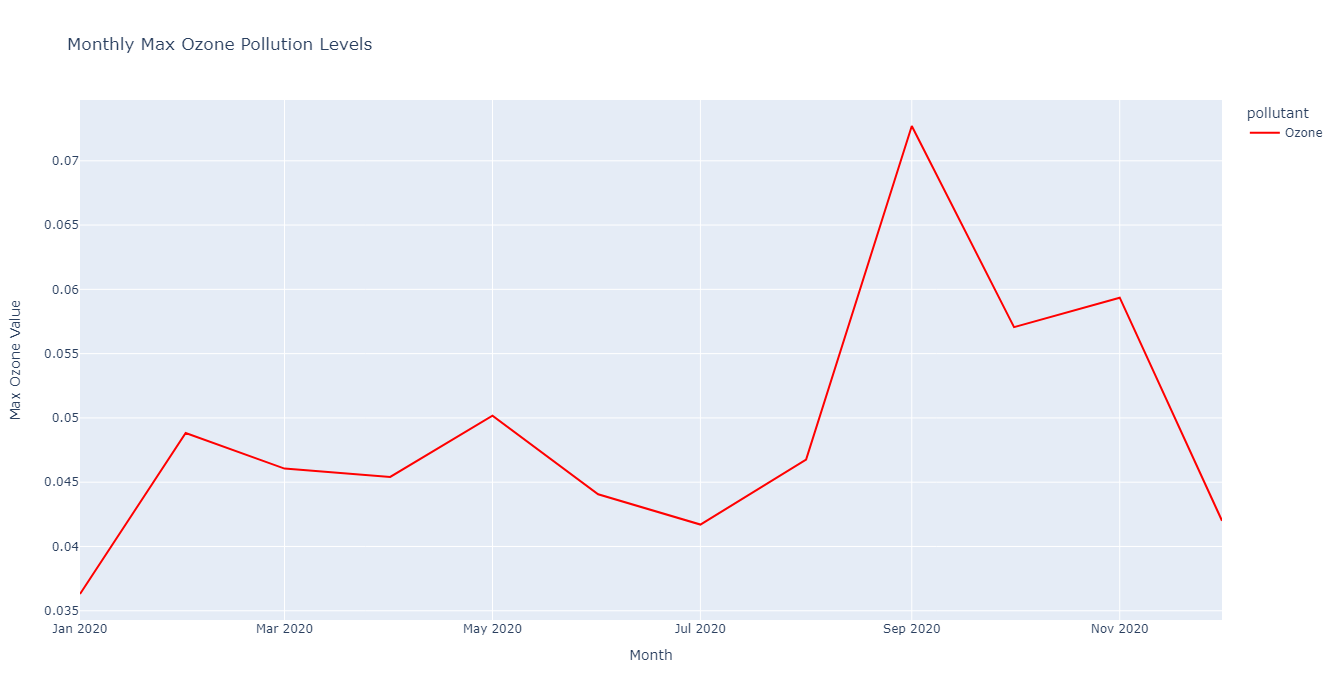

In [32]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby(['date', 'pollutant'])['max_value'].max().reset_index()

# Filter data for Carbon and Ozone
carbon_max_values = max_values_by_month[max_values_by_month['pollutant'] == 'Carbon']
ozone_max_values = max_values_by_month[max_values_by_month['pollutant'] == 'Ozone']

# Create a line plot for Carbon
fig_carbon = px.line(carbon_max_values, x='date', y='max_value', color='pollutant',
                     title='Monthly Max Carbon Pollution Levels',
                     labels={'date': 'Month', 'max_value': 'Max Carbon Value'},
                     color_discrete_map={'Carbon': 'blue'})

# Adjust figure size for Carbon plot
fig_carbon.update_layout(width=1000, height=700)

# Show the Carbon plot
fig_carbon.show()

# Create a line plot for Ozone
fig_ozone = px.line(ozone_max_values, x='date', y='max_value', color='pollutant',
                    title='Monthly Max Ozone Pollution Levels',
                    labels={'date': 'Month', 'max_value': 'Max Ozone Value'},
                    color_discrete_map={'Ozone': 'red'})

# Adjust figure size for Ozone plot
fig_ozone.update_layout(width=1000, height=700)

# Show the Ozone plot
fig_ozone.show()


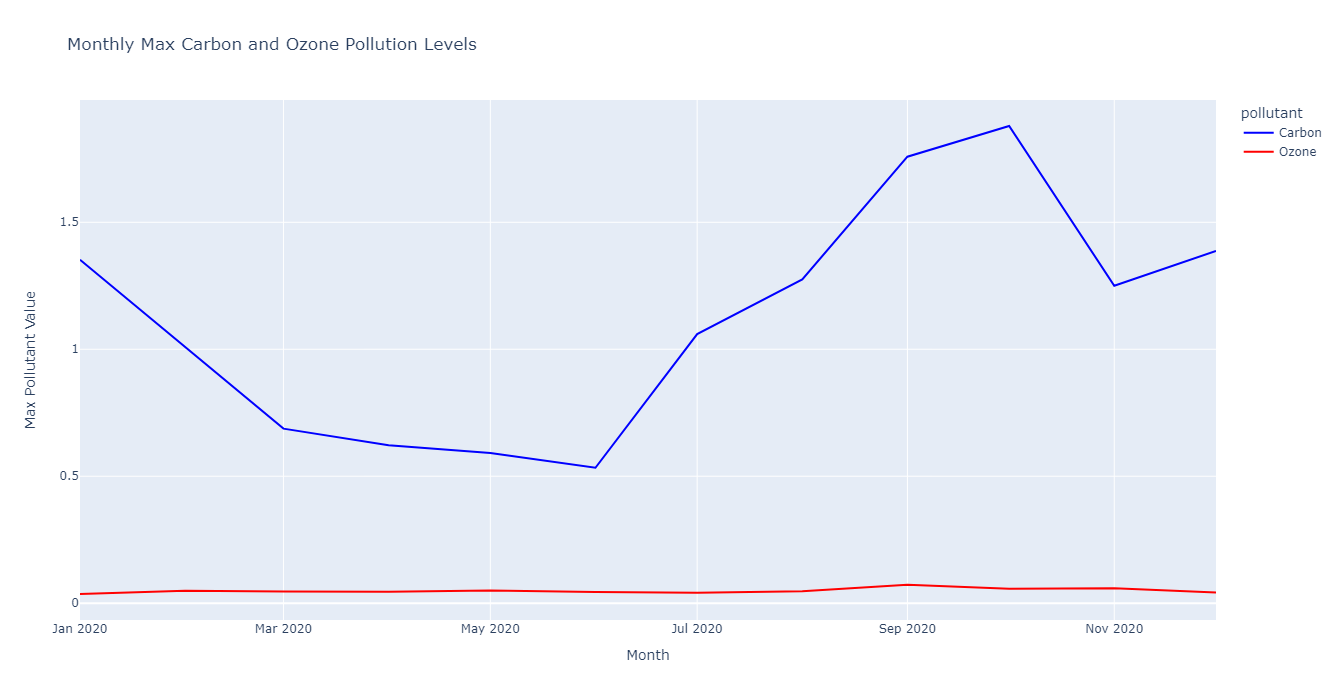

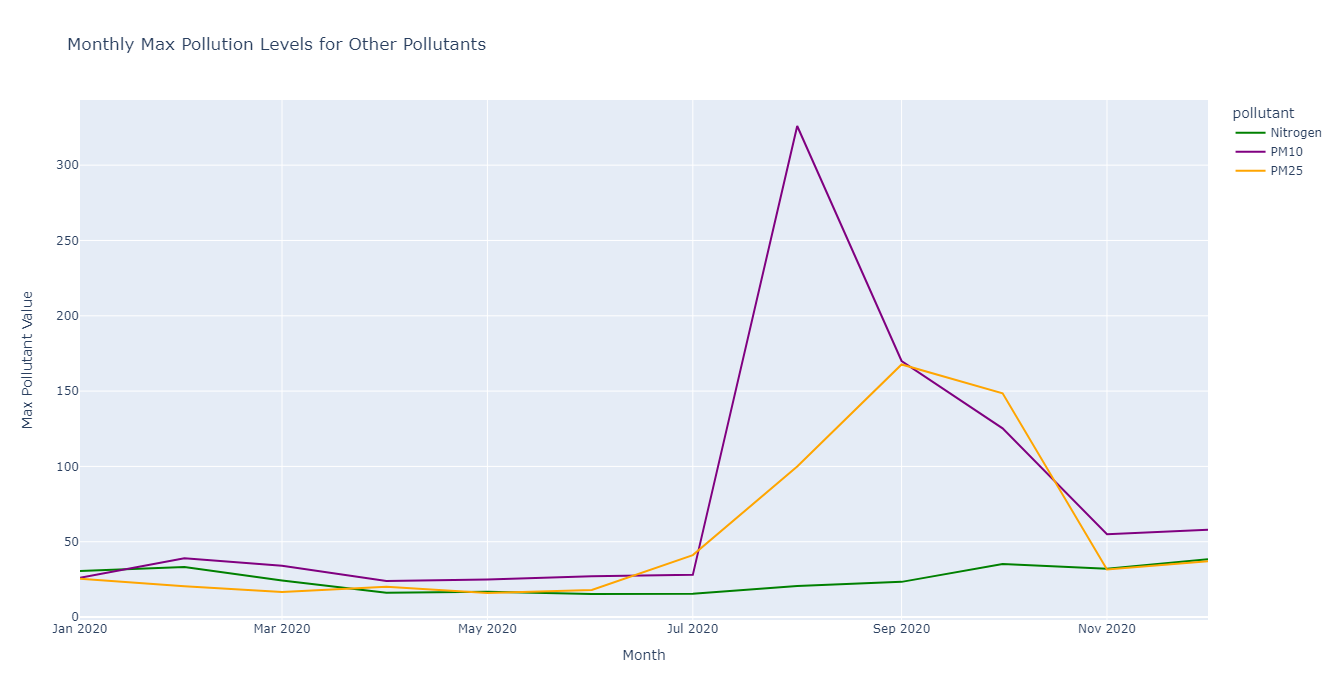

In [33]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby(['date', 'pollutant'])['max_value'].max().reset_index()

# Filter data for Carbon and Ozone
carbon_ozone_data = max_values_by_month[max_values_by_month['pollutant'].isin(['Carbon', 'Ozone'])]

# Filter data for the rest of the pollutants
other_pollutants_data = max_values_by_month[~max_values_by_month['pollutant'].isin(['Carbon', 'Ozone'])]

# Create a line plot for Carbon and Ozone
fig_carbon_ozone = px.line(carbon_ozone_data, x='date', y='max_value', color='pollutant',
                           title='Monthly Max Carbon and Ozone Pollution Levels',
                           labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                           color_discrete_map={'Carbon': 'blue', 'Ozone': 'red'})

# Adjust figure size for Carbon and Ozone plot
fig_carbon_ozone.update_layout(width=1000, height=700)

# Show the Carbon and Ozone plot
fig_carbon_ozone.show()

# Create a line plot for the other pollutants
fig_other_pollutants = px.line(other_pollutants_data, x='date', y='max_value', color='pollutant',
                               title='Monthly Max Pollution Levels for Other Pollutants',
                               labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                               color_discrete_map={'Nitrogen': 'green', 'PM10': 'purple', 'PM25': 'orange'})

# Adjust figure size for the other pollutants plot
fig_other_pollutants.update_layout(width=1000, height=700)

# Show the other pollutants plot
fig_other_pollutants.show()


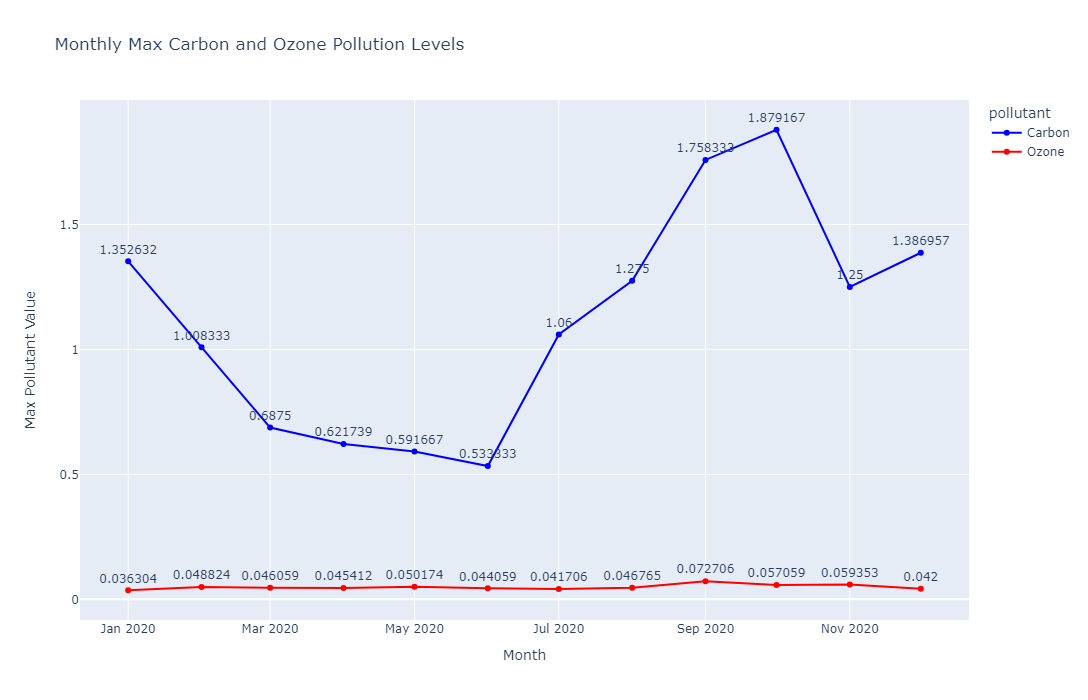

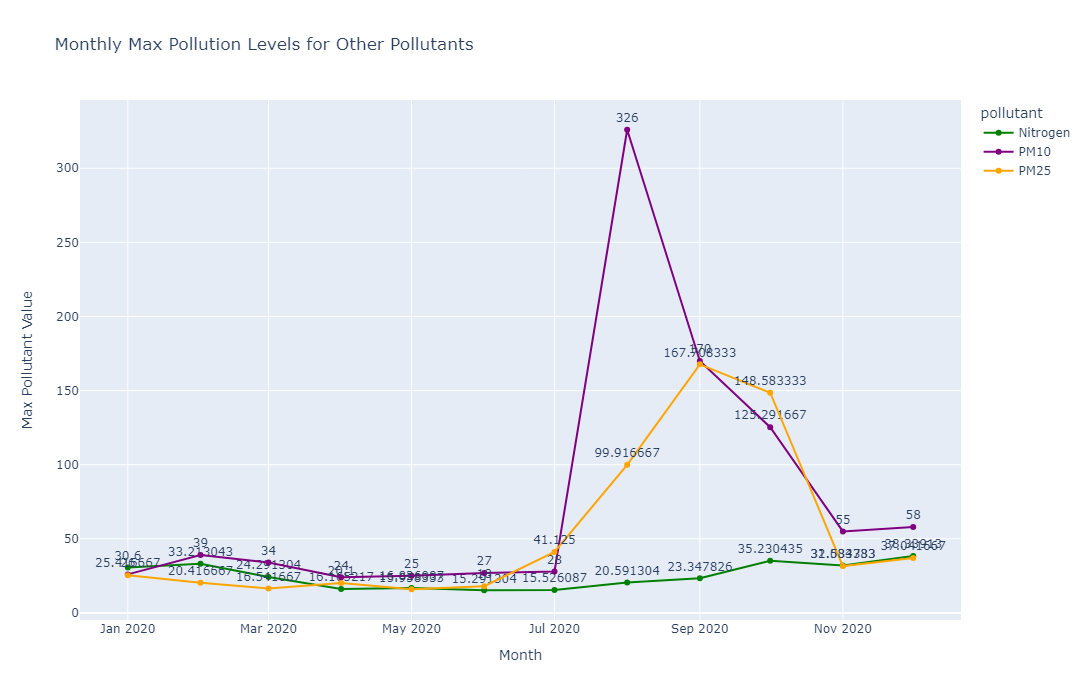

In [45]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(nitrogen_data['month'])
ozone_data['month'] = pd.to_datetime(ozone_data['month'])
pm10_data['month'] = pd.to_datetime(pm10_data['month'])
pm25_data['month'] = pd.to_datetime(pm25_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date and pollutant, and take the max value for each group
max_values_by_month = merged_data.groupby(['date', 'pollutant'])['max_value'].max().reset_index()

# Filter data for Carbon and Ozone
carbon_ozone_data = max_values_by_month[max_values_by_month['pollutant'].isin(['Carbon', 'Ozone'])]

# Filter data for the rest of the pollutants
other_pollutants_data = max_values_by_month[~max_values_by_month['pollutant'].isin(['Carbon', 'Ozone'])]

# Create a line plot for Carbon and Ozone
fig_carbon_ozone = px.line(carbon_ozone_data, x='date', y='max_value', color='pollutant',
                           title='Monthly Max Carbon and Ozone Pollution Levels',
                           labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                           color_discrete_map={'Carbon': 'blue', 'Ozone': 'red'},
                           text='max_value')

# Update figure size and show labels for Carbon and Ozone plot
fig_carbon_ozone.update_traces(textposition='top center')
fig_carbon_ozone.update_layout(width=1000, height=700)

# Show the Carbon and Ozone plot
fig_carbon_ozone.show()

# Create a line plot for the other pollutants
fig_other_pollutants = px.line(other_pollutants_data, x='date', y='max_value', color='pollutant',
                               title='Monthly Max Pollution Levels for Other Pollutants',
                               labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                               color_discrete_map={'Nitrogen': 'green', 'PM10': 'purple', 'PM25': 'orange'},
                               text='max_value')

# Update figure size and show labels for the other pollutants plot
fig_other_pollutants.update_traces(textposition='top center')
fig_other_pollutants.update_layout(width=1000, height=700)

# Show the other pollutants plot
fig_other_pollutants.show()


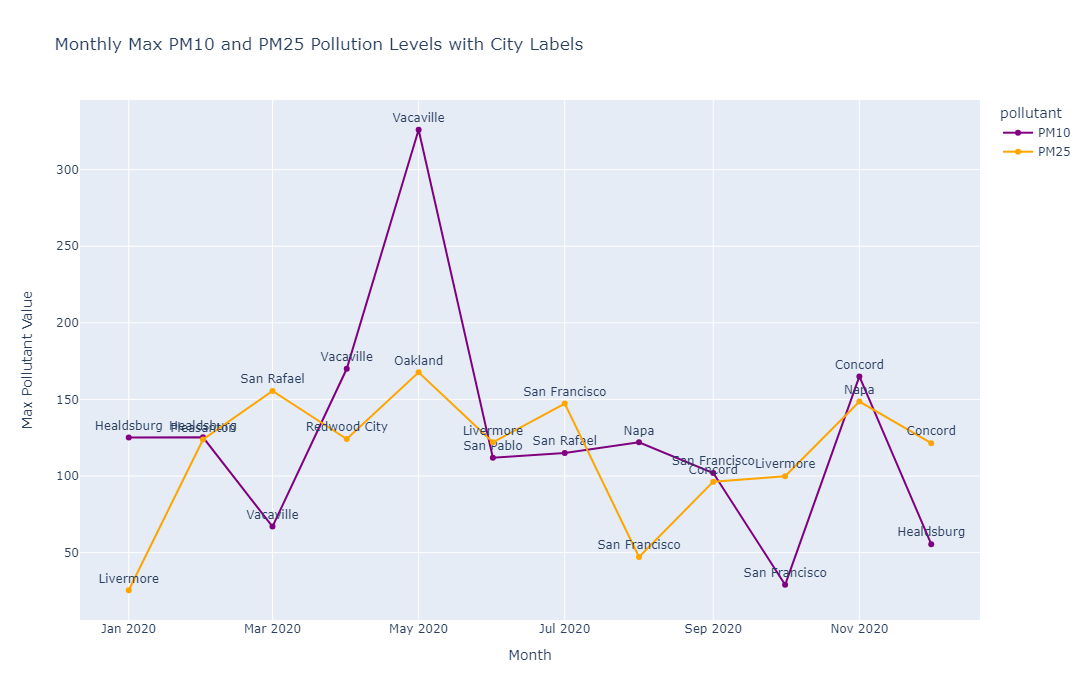

In [47]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(carbon_data['month'])
ozone_data['month'] = pd.to_datetime(carbon_data['month'])
pm10_data['month'] = pd.to_datetime(carbon_data['month'])
pm25_data['month'] = pd.to_datetime(carbon_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date, pollutant, and city, and take the max value for each group
max_values_by_month_city = merged_data.groupby(['date', 'pollutant', 'city'])['max_value'].max().reset_index()

# Filter data for PM10 and PM25
pm_data = max_values_by_month_city[max_values_by_month_city['pollutant'].isin(['PM10', 'PM25'])]

# Find the city with the max value for each month and pollutant
pm_max_by_month = pm_data.loc[pm_data.groupby(['date', 'pollutant'])['max_value'].idxmax()]

# Create a line plot for PM10 and PM25 with city labels
fig_pm = px.line(pm_max_by_month, x='date', y='max_value', color='pollutant',
                 title='Monthly Max PM10 and PM25 Pollution Levels with City Labels',
                 labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                 color_discrete_map={'PM10': 'purple', 'PM25': 'orange'},
                 text='city')

# Adjust figure size and position of labels
fig_pm.update_traces(textposition='top center')
fig_pm.update_layout(width=1000, height=700)

# Show the PM10 and PM25 plot
fig_pm.show()


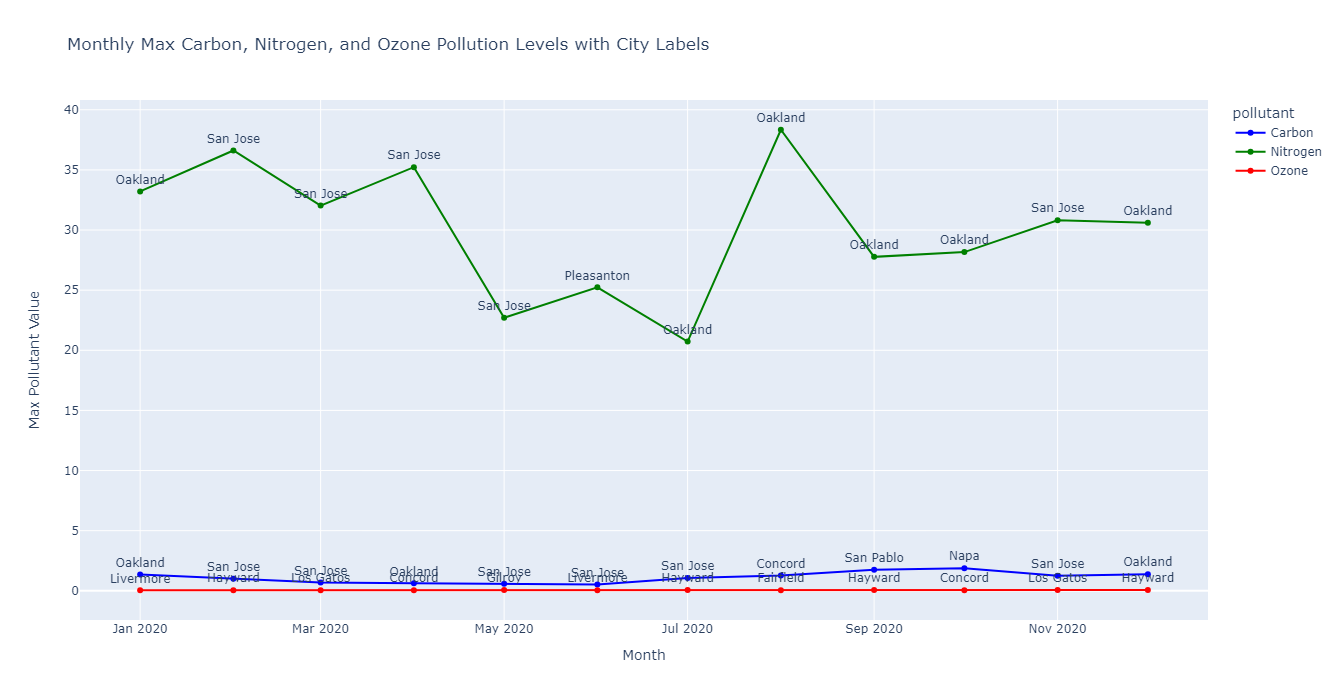

In [48]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(carbon_data['month'])
ozone_data['month'] = pd.to_datetime(carbon_data['month'])
pm10_data['month'] = pd.to_datetime(carbon_data['month'])
pm25_data['month'] = pd.to_datetime(carbon_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date, pollutant, and city, and take the max value for each group
max_values_by_month_city = merged_data.groupby(['date', 'pollutant', 'city'])['max_value'].max().reset_index()

# Filter data for Carbon, Nitrogen, and Ozone
cno_data = max_values_by_month_city[max_values_by_month_city['pollutant'].isin(['Carbon', 'Nitrogen', 'Ozone'])]

# Find the city with the max value for each month and pollutant
cno_max_by_month = cno_data.loc[cno_data.groupby(['date', 'pollutant'])['max_value'].idxmax()]

# Create a line plot for Carbon, Nitrogen, and Ozone with city labels
fig_cno = px.line(cno_max_by_month, x='date', y='max_value', color='pollutant',
                  title='Monthly Max Carbon, Nitrogen, and Ozone Pollution Levels with City Labels',
                  labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                  color_discrete_map={'Carbon': 'blue', 'Nitrogen': 'green', 'Ozone': 'red'},
                  text='city')

# Adjust figure size and position of labels
fig_cno.update_traces(textposition='top center')
fig_cno.update_layout(width=1000, height=700)

# Show the Carbon, Nitrogen, and Ozone plot
fig_cno.show()


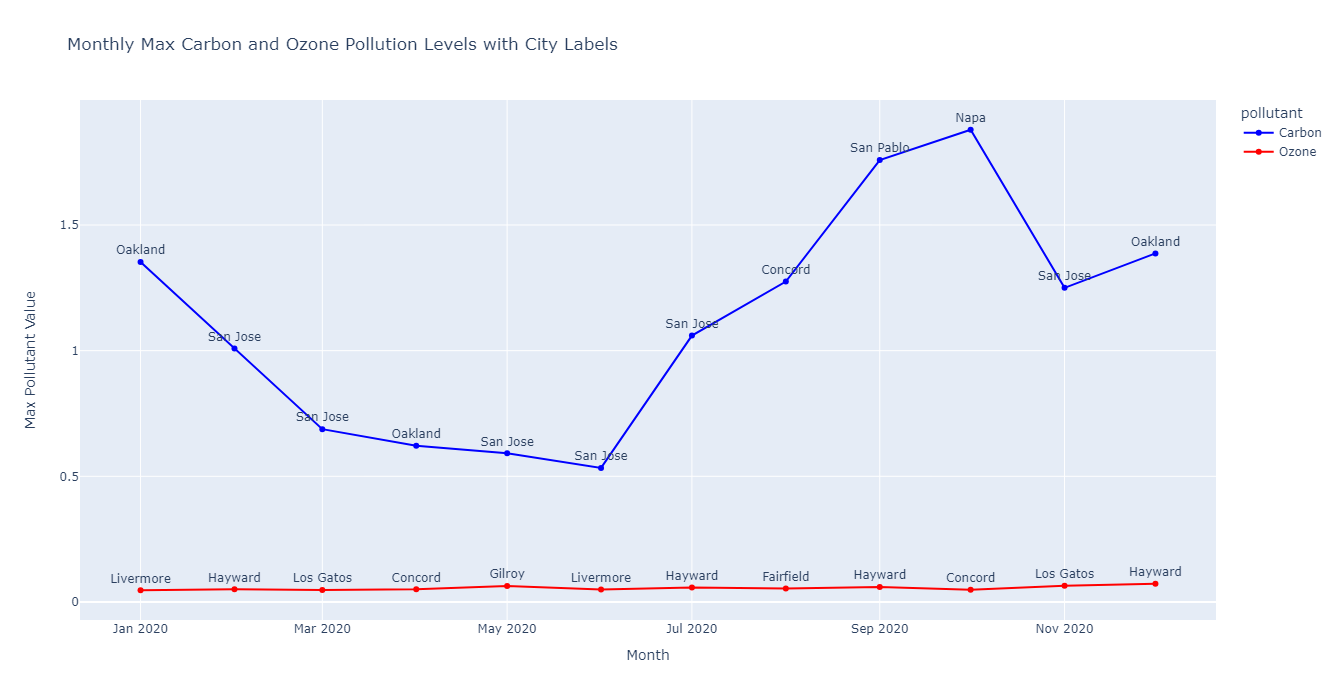

In [49]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(carbon_data['month'])
ozone_data['month'] = pd.to_datetime(carbon_data['month'])
pm10_data['month'] = pd.to_datetime(carbon_data['month'])
pm25_data['month'] = pd.to_datetime(carbon_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date, pollutant, and city, and take the max value for each group
max_values_by_month_city = merged_data.groupby(['date', 'pollutant', 'city'])['max_value'].max().reset_index()

# Filter data for Carbon and Ozone
carbon_ozone_data = max_values_by_month_city[max_values_by_month_city['pollutant'].isin(['Carbon', 'Ozone'])]

# Find the city with the max value for each month and pollutant
carbon_ozone_max_by_month = carbon_ozone_data.loc[carbon_ozone_data.groupby(['date', 'pollutant'])['max_value'].idxmax()]

# Create a line plot for Carbon and Ozone with city labels
fig_carbon_ozone = px.line(carbon_ozone_max_by_month, x='date', y='max_value', color='pollutant',
                           title='Monthly Max Carbon and Ozone Pollution Levels with City Labels',
                           labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                           color_discrete_map={'Carbon': 'blue', 'Ozone': 'red'},
                           text='city')

# Adjust figure size and position of labels
fig_carbon_ozone.update_traces(textposition='top center')
fig_carbon_ozone.update_layout(width=1000, height=700)

# Show the Carbon and Ozone plot
fig_carbon_ozone.show()


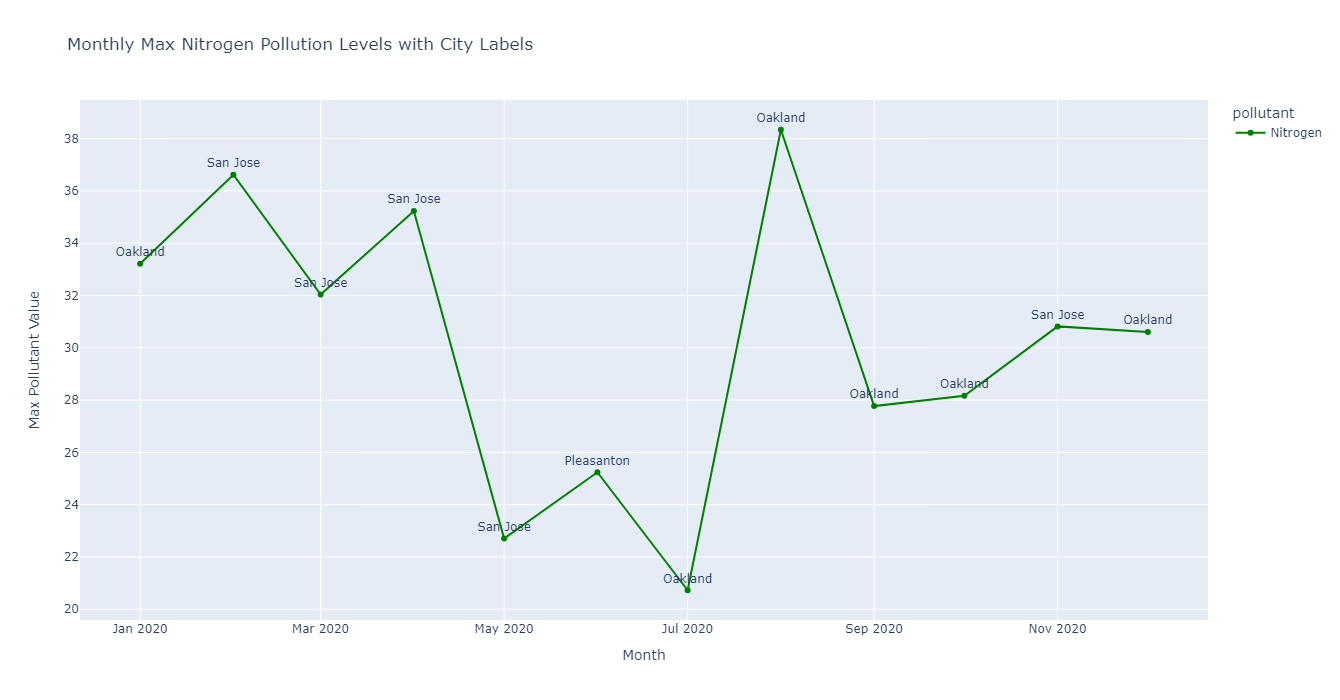

In [50]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the path to the output_data directory
output_data_path = r'C:\JGonzalez\Classwork\New_Project_1\output_data'

# Load the data from CSV files
carbon_file = os.path.join(output_data_path, 'income_carbon_merged.csv')
nitrogen_file = os.path.join(output_data_path, 'income_nitrogen_merged.csv')
ozone_file = os.path.join(output_data_path, 'income_ozone_merged.csv')
pm10_file = os.path.join(output_data_path, 'income_pm10_merged.csv')
pm25_file = os.path.join(output_data_path, 'income_pm25_merged.csv')

carbon_data = pd.read_csv(carbon_file)
nitrogen_data = pd.read_csv(nitrogen_file)
ozone_data = pd.read_csv(ozone_file)
pm10_data = pd.read_csv(pm10_file)
pm25_data = pd.read_csv(pm25_file)

# Ensure the 'month' column is in datetime format
carbon_data['month'] = pd.to_datetime(carbon_data['month'])
nitrogen_data['month'] = pd.to_datetime(carbon_data['month'])
ozone_data['month'] = pd.to_datetime(carbon_data['month'])
pm10_data['month'] = pd.to_datetime(carbon_data['month'])
pm25_data['month'] = pd.to_datetime(carbon_data['month'])

# Rename columns to a consistent format
carbon_data.rename(columns={'carbon max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
nitrogen_data.rename(columns={'nitrogen max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
ozone_data.rename(columns={'ozone max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm10_data.rename(columns={'pm10 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)
pm25_data.rename(columns={'pm25 max': 'max_value', 'month': 'date', 'median_income_2020': 'median_income'}, inplace=True)

# Add a 'pollutant' column to each DataFrame
carbon_data['pollutant'] = 'Carbon'
nitrogen_data['pollutant'] = 'Nitrogen'
ozone_data['pollutant'] = 'Ozone'
pm10_data['pollutant'] = 'PM10'
pm25_data['pollutant'] = 'PM25'

# Concatenate all DataFrames into one
merged_data = pd.concat([carbon_data, nitrogen_data, ozone_data, pm10_data, pm25_data])

# Group by date, pollutant, and city, and take the max value for each group
max_values_by_month_city = merged_data.groupby(['date', 'pollutant', 'city'])['max_value'].max().reset_index()

# Filter data for Nitrogen
nitrogen_data = max_values_by_month_city[max_values_by_month_city['pollutant'] == 'Nitrogen']

# Find the city with the max value for each month
nitrogen_max_by_month = nitrogen_data.loc[nitrogen_data.groupby(['date', 'pollutant'])['max_value'].idxmax()]

# Create a line plot for Nitrogen with city labels
fig_nitrogen = px.line(nitrogen_max_by_month, x='date', y='max_value', color='pollutant',
                       title='Monthly Max Nitrogen Pollution Levels with City Labels',
                       labels={'date': 'Month', 'max_value': 'Max Pollutant Value'},
                       color_discrete_map={'Nitrogen': 'green'},
                       text='city')

# Adjust figure size and position of labels
fig_nitrogen.update_traces(textposition='top center')
fig_nitrogen.update_layout(width=1000, height=700)

# Show the Nitrogen plot
fig_nitrogen.show()
